<a href="https://colab.research.google.com/github/hirobirofran/100knocks-preprocess-progress/blob/main/dotData%E6%A7%98%E8%AA%B2%E9%A1%8C_%E8%AA%B2%E9%A1%8C1_202503_fujino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 課題1. データのサニティチェックとEDA

## よく使うライブラリ

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from typing import List
from typing import Tuple

## 定義値

In [2]:
# 必要に応じて変更して利用する

INPUT_BASE_PATH: str = '/content/workspace/orig_data'
INPUT_RECEIVED_SALES_FILE_NAME = '販売履歴.csv'
INPUT_RECEIVED_VENDOR_FILE_NAME = 'ベンダーマスタ.csv'
INPUT_RECEIVED_STORE_FILE_NAME = '店舗マスタ.csv'

OUTPUT_BASE_PATH: str = INPUT_BASE_PATH
OUTPUT_CLEANED_SALES_FILE_NAME: str = 'cleaned_sales_data.csv'
OUTPUT_CLEANED_VENDOR_FILE_NAME: str = 'cleaned_vendor_data.csv'
OUTPUT_CLEANED_STORE_FILE_NAME: str = 'cleaned_store_data.csv'

## データの読み込み

### CSVファイルをPandasライブラリを使って読み込みます

In [3]:
def load_data():
    """pandasを使ってCSVファイルからデータを読み込みます。

    Returns:
        tuple: 販売履歴、ベンダーマスタ、店舗マスタのpandas DataFrameを含むタプル。
    """
    sales_data = pd.read_csv(os.path.join(INPUT_BASE_PATH, INPUT_RECEIVED_SALES_FILE_NAME))
    vendor_data = pd.read_csv(os.path.join(INPUT_BASE_PATH, INPUT_RECEIVED_VENDOR_FILE_NAME))
    store_data = pd.read_csv(os.path.join(INPUT_BASE_PATH, INPUT_RECEIVED_STORE_FILE_NAME))
    return sales_data, vendor_data, store_data

# データを読み込む
sales_data, vendor_data, store_data = load_data()

### ファイルごとにヘッダー行やデータ型を確認する

In [4]:
def display_dataframe_summary(df: pd.DataFrame, num_rows: int = 10) -> None:
    """
    Pandas DataFrame の概要と先頭の数行を表示する関数。

    Args:
        df (pd.DataFrame): 表示する DataFrame。
        num_rows (int, optional): .head() を使って表示する行数。デフォルトは 5 です。

    Returns:
        None
    """
    print(df.info())  # DataFrame の情報を表示
    #print(df.head(num_rows))  # 先頭の数行を表示
    display(df.head(num_rows))  # 先頭の数行を表示

    num_columns = len(df.columns)
    num_rows = len(df)
    print(f"このDataFrameには、{num_columns}個の列と{num_rows}個の行が含まれています。")
    # データ型ごとの列数を集計し、考察文章に追加
    dtype_counts = df.dtypes.value_counts()
    dtype_info = ", ".join([f"{dtype}: {count}列" for dtype, count in dtype_counts.items()])
    print(f"データ型の内訳は、{dtype_info}となっています。")

display_dataframe_summary(sales_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288737 entries, 0 to 288736
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   288737 non-null  object 
 1   Store Number           288737 non-null  int64  
 2   Category               288737 non-null  float64
 3   Category Name          288737 non-null  object 
 4   Vendor Number          288736 non-null  float64
 5   Item Number            288737 non-null  int64  
 6   Item Description       288737 non-null  object 
 7   Bottle Volume (ml)     288737 non-null  int64  
 8   Bottles Sold           288737 non-null  int64  
 9   Sale (Dollars)         288737 non-null  float64
 10  Volume Sold (Liters)   288737 non-null  float64
 11  Volume Sold (Gallons)  288737 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 26.4+ MB
None


,Date,Store Number,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,08/16/2022,4829,1081600.0,WHISKEY LIQUEUR,620.0,85980,DOUGH BALL COOKIE DOUGH WHISKEY,750,6,157.86,4.50,1.18
1,08/16/2022,4829,1071000.0,COCKTAILS/RTD,421.0,57051,BARTON LONG ISLAND ICED TEA,1000,36,221.40,36.00,9.51
2,08/15/2022,4829,1031100.0,AMERICAN VODKAS,380.0,37347,PHILLIPS VODKA,1000,60,386.40,60.00,15.85
3,08/12/2022,4829,1041100.0,AMERICAN DRY GINS,564.0,30668,RIEGERS MIDWESTERN DRY GIN,750,6,119.88,4.50,1.18
4,08/16/2022,4829,1022200.0,100% AGAVE TEQUILA,260.0,87280,CASAMIGOS BLANCO,750,60,2415.60,45.00,11.88
5,08/15/2022,2190,1081600.0,WHISKEY LIQUEUR,421.0,101515,FIREBALL CINNAMON WHISKEY KEG,5250,1,138.00,5.25,1.38
6,08/12/2022,4829,1062500.0,FLAVORED RUM,305.0,42204,BLUE CHAIR BAY BANANA RUM,750,3,47.22,2.25,0.59
7,08/16/2022,2633,1062300.0,AGED DARK RUM,205.0,43641,DIPLOMATICO RESERVA EXCLUSIVA,750,6,202.50,4.50,1.18
8,08/15/2022,2633,1022200.0,100% AGAVE TEQUILA,260.0,89200,DON JULIO 70TH ANNIVERSARY,750,6,328.44,4.50,1.18
9,08/12/2022,2190,1082100.0,IMPORTED CORDIALS & LIQUEURS,363.0,66056,NONINO AMARO QUINTESSENTIA,750,6,281.82,4.50,1.18


このDataFrameには、12個の列と288737個の行が含まれています。
データ型の内訳は、float64: 5列, int64: 4列, object: 3列となっています。


In [5]:
display_dataframe_summary(vendor_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Vendor Number  272 non-null    int64 
 1   Vendor Name    272 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB
None


,Vendor Number,Vendor Name
0,620,MPL BRANDS NV INC/ PATCO BRANDS
1,421,SAZERAC COMPANY INC
2,380,PHILLIPS BEVERAGE
3,564,JACOB RIEGER & COMPANY LLC
4,260,DIAGEO AMERICAS
5,305,MHW LTD
6,205,E & J GALLO WINERY
7,363,PATERNO IMPORTS LTD / TERLATO WINES INTERNATIONAL
8,777,"BLUE OX SPIRITS, INC."
9,65,JIM BEAM BRANDS


このDataFrameには、2個の列と272個の行が含まれています。
データ型の内訳は、int64: 1列, object: 1列となっています。


In [6]:
display_dataframe_summary(store_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store Number   6 non-null      int64  
 1   Store Name     6 non-null      object 
 2   Address        6 non-null      object 
 3   Zip Code       6 non-null      int64  
 4   County Number  6 non-null      float64
 5   County         6 non-null      object 
dtypes: float64(1), int64(2), object(3)
memory usage: 420.0+ bytes
None


,Store Number,Store Name,Address,Zip Code,County Number,County
0,2500,HY-VEE FOOD STORE #1 / AMES,3800 W LINCOLN WAY,50010,85.0,STORY
1,4829,CENTRAL CITY 2,1501 MICHIGAN AVE,50314,77.0,POLK
2,2190,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,50314,77.0,POLK
3,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,50320,77.0,POLK
4,2572,HY-VEE FOOD STORE / CEDAR FALLS,6301 UNIVERSITY,50613,7.0,BLACK HAWK
5,2190,CENTRAL CITY 2,1460 2ND AVE,50314,77.0,POLK


このDataFrameには、6個の列と6個の行が含まれています。
データ型の内訳は、object: 3列, int64: 2列, float64: 1列となっています。


## サニティチェック

### データ仕様との一致確認

#### 各カラムのデータ型とNull値の有無を確認

In [7]:
def check_data_types_and_missing_values(df: pd.DataFrame) -> None:
    """
    データフレームのデータ型と欠損値の概要を表示する関数。
    処理結果を得られた情報、数値をつかって、動的に考察文章を出力する処理を追加。
    考察文章には、欠損値の数、欠損値がある列名、欠損率、
    欠損値が分析に与える影響、適切な対応策の検討など、網羅的に含める。
    1行だけの欠損値を削除することについての考察を追加。

    Args:
        df (pd.DataFrame): チェック対象のデータフレーム。

    Returns:
        None
    """
    print("=== データ型 ===")
    print(df.dtypes)  # データ型を表示
    print("\n=== 欠損値の概要 ===")  # 改行を入れて見やすくする
    missing_values = df.isnull().sum()  # 欠損値の数を取得
    print(missing_values)  # 欠損値の数を表示

    total_missing = missing_values.sum()  # DataFrame全体の欠損値数
    if total_missing == 0:
        print("\nこのDataFrameには欠損値がありません。")
    else:
        missing_columns = missing_values[missing_values > 0].index.tolist()  # 欠損値がある列名リスト
        print(f"\nこのDataFrameには合計 {total_missing} 個の欠損値があります。")
        print(f"欠損値がある列: {', '.join(missing_columns)}")

        # 欠損値に関するより深い考察を追加
        for column in missing_columns:
            missing_count = missing_values[column]
            total_count = len(df)
            missing_percentage = (missing_count / total_count) * 100
            print(f"\n- 列 '{column}' には {missing_count} 個の欠損値があります (全体の {missing_percentage:.2f}%)。")

            # 欠損値の影響と対応策に関する考察 (より具体的で網羅的な例)
            print("  - 影響:")
            if column in df.columns:  # 存在しない列名が入力された場合のエラー回避
                if df[column].dtype in ['int64', 'float64']:  # 数値データの場合
                    print(f"    - {column}列の数値計算(平均、合計など)に影響を与える可能性があります。")
                    print(f"    - {column}列を含む分析結果の信頼性が低下する可能性があります。")
                else:  # カテゴリデータの場合
                    print(f"    - {column}列のカテゴリ別の集計結果に影響を与える可能性があります。")
                    print(f"    - {column}列を含む分析において、特定のカテゴリの傾向が正しく把握できない可能性があります。")

            print("  - 対応策:")
            # 1行だけの欠損値を削除することについての考察を追加
            if missing_count == 1:
                print(f"    - 欠損値が1行のみなので、削除を検討できます。ただし、削除による影響 (情報量の減少、偏りの発生) を考慮する必要があります。")
                print(f"    - 欠損値を含む行の特徴を分析し、削除が適切かどうか判断する必要があります。")
            else:
                print(f"    - 欠損値が少量であれば、該当する行を削除する事が考えられます。ただし、削除による影響 (情報量の減少、偏りの発生) を考慮する必要があります。")
            if df[column].dtype in ['int64', 'float64']:
                print(f"    - {column}列が数値データの場合は、平均値、中央値、最頻値などで欠損値を補完する事が考えられます。")
            else:
                print(f"    - {column}列がカテゴリデータの場合は、最頻値や「不明」などの新たなカテゴリで欠損値を補完する事が考えられます。")
            print(f"    - 欠損値が多い場合は、欠損値が発生する原因を調査し、データ収集方法や入力方法を見直す必要があります。")
            print(f"    - {column}列と強い相関関係を持つ他の列の値から、欠損値を推定する事も考えられます。")

check_data_types_and_missing_values(sales_data)

=== データ型 ===
Date                      object
Store Number               int64
Category                 float64
Category Name             object
Vendor Number            float64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

=== 欠損値の概要 ===
Date                     0
Store Number             0
Category                 0
Category Name            0
Vendor Number            1
Item Number              0
Item Description         0
Bottle Volume (ml)       0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

このDataFrameには合計 1 個の欠損値があります。
欠損値がある列: Vendor Number

- 列 'Vendor Number' には 1 個の欠損値があります (全体の 0.00%)。
  - 影響:
    - Vendor Number列の数値計算(平均、合計など)に影響を与える可能性があります。
    - Vendor Number列を含む分析結果の信頼性が低下する可能性があります。
  - 対応策:
    - 

#### 欠損値の削除（販売履歴、Vendor Number列）

In [8]:
def drop_rows_with_missing_values(
    df: pd.DataFrame,
    column_names: List[str] = None
) -> pd.DataFrame:
    """
    指定されたカラムに欠損値がある行をデータフレームから削除する関数。

    Args:
        df (pd.DataFrame): 処理対象のデータフレーム。
        column_names (List[str], optional): 欠損値をチェックするカラム名のリスト。
            指定しない場合は、すべてのカラムをチェックします。Defaults to None.

    Returns:
        pd.DataFrame: 欠損値を含む行が削除されたデータフレーム。
    """

    # column_namesが指定されていない場合は、すべてのカラムを対象とする
    if column_names is None:
        column_names = df.columns

    # 指定されたカラムに欠損値がある行を削除
    cleaned_df = df.dropna(subset=column_names)

    return cleaned_df

# 'Vendor Number' 列の欠損値を含む行を削除
sales_data = drop_rows_with_missing_values(sales_data, column_names=['Vendor Number'])

# 処理後の確認
check_data_types_and_missing_values(sales_data)

=== データ型 ===
Date                      object
Store Number               int64
Category                 float64
Category Name             object
Vendor Number            float64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

=== 欠損値の概要 ===
Date                     0
Store Number             0
Category                 0
Category Name            0
Vendor Number            0
Item Number              0
Item Description         0
Bottle Volume (ml)       0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

このDataFrameには欠損値がありません。


In [9]:
check_data_types_and_missing_values(vendor_data)

=== データ型 ===
Vendor Number     int64
Vendor Name      object
dtype: object

=== 欠損値の概要 ===
Vendor Number    0
Vendor Name      0
dtype: int64

このDataFrameには欠損値がありません。


In [10]:
check_data_types_and_missing_values(store_data)

=== データ型 ===
Store Number       int64
Store Name        object
Address           object
Zip Code           int64
County Number    float64
County            object
dtype: object

=== 欠損値の概要 ===
Store Number     0
Store Name       0
Address          0
Zip Code         0
County Number    0
County           0
dtype: int64

このDataFrameには欠損値がありません。


### データクレンジング

#### Null値の処理

In [11]:
# ※PoCデータのPKにNULLは存在しないが

# vendor_data から 'Vendor Number' カラムの Null 値を含む行を削除
vendor_data = drop_rows_with_missing_values(vendor_data, 'Vendor Number')

# 結果を確認
check_data_types_and_missing_values(vendor_data)

=== データ型 ===
Vendor Number     int64
Vendor Name      object
dtype: object

=== 欠損値の概要 ===
Vendor Number    0
Vendor Name      0
dtype: int64

このDataFrameには欠損値がありません。


In [12]:
# ※PoCデータのPKにNULLは存在しないが

# store_data から 'Store Number' カラムの Null 値を含む行を削除
store_data = drop_rows_with_missing_values(store_data, 'Store Number')

# 結果を確認
check_data_types_and_missing_values(store_data)

=== データ型 ===
Store Number       int64
Store Name        object
Address           object
Zip Code           int64
County Number    float64
County            object
dtype: object

=== 欠損値の概要 ===
Store Number     0
Store Name       0
Address          0
Zip Code         0
County Number    0
County           0
dtype: int64

このDataFrameには欠損値がありません。


#### データ型の修正

In [13]:
def convert_date_column_to_datetime(
      df: pd.DataFrame,
      date_column_name: str ='Date'
    ) ->pd.DataFrame:
    """
    データフレーム内の指定された日付カラムを日付型に変換する関数。
    型異常は NaT に変換される

    Args:
        df (pd.DataFrame): 変換対象のデータフレーム。
        date_column_name (str): 日付カラムの名前。デフォルトは 'Date'。

    Returns:
        pd.DataFrame: 日付カラムが日付型に変換されたデータフレーム。
    """
    df[date_column_name] = pd.to_datetime(df[date_column_name], errors='coerce')
    return df

# sales_data の 'Date' カラムを日付型に変換
sales_data = convert_date_column_to_datetime(sales_data)

def detect_invalid_dates(
      df: pd.DataFrame,
      date_column_name: str ='Date'
    ) ->pd.DataFrame:
    """
    データフレーム内の指定された日付カラムの型異常がある行を検出する関数。

    Args:
        df (pd.DataFrame): チェック対象のデータフレーム。
        date_column_name (str): 日付カラムの名前。デフォルトは 'Date'。

    Returns:
        pd.DataFrame: 型異常がある行を含むデータフレーム。
    """

    # 型異常がある行を特定
    invalid_dates = df[df[date_column_name].isna()]

    # 結果を出力
    print("=== 型異常がある行 ===")
    print(invalid_dates)

    return invalid_dates

# 関数を使用して型異常がある行を検出
invalid_dates = detect_invalid_dates(sales_data)

def remove_invalid_date_rows(
      df: pd.DataFrame,
      date_column_name: str ='Date'
    ) ->pd.DataFrame:
    """
    データフレームから、指定された日付カラムに異常値（欠損値）を持つ行を削除する関数。

    Args:
        df (pd.DataFrame): 処理対象のデータフレーム。
        date_column_name (str): 日付カラムの名前。デフォルトは 'Date'。

    Returns:
        pd.DataFrame: 異常値を含む行が削除されたデータフレーム。
    """
    cleaned_df = df[df[date_column_name].notna()]
    return cleaned_df

# 'Date' カラムの異常値を含む行を削除
sales_data = remove_invalid_date_rows(sales_data)

# 変換後のデータ確認
print("=== 正常な日付データ ===")
print(sales_data['Date'].head())

#print(sales_data.info())

=== 型異常がある行 ===
Empty DataFrame
Columns: [Date, Store Number, Category, Category Name, Vendor Number, Item Number, Item Description, Bottle Volume (ml), Bottles Sold, Sale (Dollars), Volume Sold (Liters), Volume Sold (Gallons)]
Index: []
=== 正常な日付データ ===
0   2022-08-16
1   2022-08-16
2   2022-08-15
3   2022-08-12
4   2022-08-16
Name: Date, dtype: datetime64[ns]


#### 不正データの除外

In [14]:
def check_zero_or_negative_sales(sales_data: pd.DataFrame) -> pd.DataFrame:
    """
    sales_data から売上金額が0以下の行を抽出し、結果を表示する関数。
    処理結果に応じた動的な考察文章を出力する機能を追加。
    処理から得られた情報、数値をつかって、その程度を表現できるようにする。

    Args:
        sales_data (pd.DataFrame): 売上データを含むデータフレーム。

    Returns:
        pd.DataFrame: 売上金額が0以下の行を含むデータフレーム (存在しない場合は空のデータフレーム)。
    """

    # Sale (Dollars) カラムで0以下の値を持つ行を抽出
    zero_or_negative_sales = sales_data[sales_data['Sale (Dollars)'] <= 0]

    # 結果を確認
    if not zero_or_negative_sales.empty:
        print("=== 0以下の売上が存在します ===")
        display(zero_or_negative_sales)  # 抽出された行を表示

        # 動的な考察文章を出力
        num_problematic_sales = len(zero_or_negative_sales)
        total_sales = len(sales_data)
        percentage_problematic_sales = (num_problematic_sales / total_sales) * 100

        print(f"### 0以下の売上件数は {num_problematic_sales} 件です。")
        print(f"### 売上全体に占める割合は {percentage_problematic_sales:.2f}% です。")

        print(
            "**考察:** \n売上金額が0以下であることは、ビジネスロジック上、\n"
            "異常値または特別な状況を示している可能性があります。\n"
            "返品、割引、キャンセルなどが考えられます。\n"
        )
        print(
            "**アクション:**\n"
            " 以下の点を調査・検討してください。\n"
            "1. 0以下の売上の発生原因を特定する。\n"
            "2. 原因に応じて、データの修正、削除、または分析から除外などの対応を行う。\n"
            "3. 必要であれば、ビジネスプロセスやデータ入力方法の見直しを行う。\n"
        )

        if percentage_problematic_sales < 1:  # 1%未満なら削除を提案
            print(
                "割合が1%未満と比較的小さいので、削除も検討できます。ただし、\n"
                "返品などの重要な情報が含まれている可能性もあるため、\n"
                "ビジネス要件や分析の目的を考慮して判断する必要があります。"
            )
            print(
                "削除する場合は、以下のコードをコピー＆ペーストして使用してください:\n"
                "sales_data = sales_data[sales_data['Sale (Dollars)'] > 0]\n"
            )
            print("**注意:** このコードを実行すると、売上金額が0以下の行が削除されます。")

    else:
        print("### 0以下の売上は存在しませんでした。")

    return zero_or_negative_sales  # 抽出された行を返す

zero_or_negative_sales_df = check_zero_or_negative_sales(sales_data)

=== 0以下の売上が存在します ===


,Date,Store Number,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
11322,2022-10-12,2190,1022200.0,100% AGAVE TEQUILA,368.0,87370,CODIGO 1530 TEQUILA ROSA BLANCO,750,-2,-97.50,-1.5,-0.39
11490,2022-10-14,2633,1012100.0,CANADIAN WHISKIES,260.0,11297,CROWN ROYAL,1000,-36,-1079.64,-36.0,-9.51
11599,2022-10-18,4829,1081400.0,AMERICAN SCHNAPPS,65.0,82637,DEKUYPER GRAPE PUCKER,1000,-1,-11.81,-1.0,-0.26
16093,2023-02-08,2633,1031100.0,AMERICAN VODKAS,566.0,36878,FOUNDRY VODKA,750,-60,-714.00,-45.0,-11.88
16136,2023-02-14,2633,1022200.0,100% AGAVE TEQUILA,192.0,88355,TEREMANA BLANCO TEQUILA,1000,-6,-166.14,-6.0,-1.58
...,...,...,...,...,...,...,...,...,...,...,...,...
283087,2024-08-12,2572,1062400.0,SPICED RUM,380.0,73199,CORAL ISLE SPICED RUM,1750,-12,-165.24,-21.0,-5.54
283111,2024-08-16,2633,1031200.0,AMERICAN FLAVORED VODKA,205.0,39420,NEW AMSTERDAM WATERMELON,750,-12,-144.00,-9.0,-2.37
283113,2024-08-20,2633,1022200.0,100% AGAVE TEQUILA,255.0,89233,CORRALEJO ANEJO,750,-6,-214.20,-4.5,-1.18
288454,2024-09-24,2633,1082100.0,IMPORTED CORDIALS & LIQUEURS,368.0,65543,LICOR 43 CHOCOLATE,750,-6,-148.44,-4.5,-1.18


### 0以下の売上件数は 205 件です。
### 売上全体に占める割合は 0.07% です。
**考察:** 
売上金額が0以下であることは、ビジネスロジック上、
異常値または特別な状況を示している可能性があります。
返品、割引、キャンセルなどが考えられます。

**アクション:**
 以下の点を調査・検討してください。
1. 0以下の売上の発生原因を特定する。
2. 原因に応じて、データの修正、削除、または分析から除外などの対応を行う。
3. 必要であれば、ビジネスプロセスやデータ入力方法の見直しを行う。

割合が1%未満と比較的小さいので、削除も検討できます。ただし、
返品などの重要な情報が含まれている可能性もあるため、
ビジネス要件や分析の目的を考慮して判断する必要があります。
削除する場合は、以下のコードをコピー＆ペーストして使用してください:
sales_data = sales_data[sales_data['Sale (Dollars)'] > 0]

**注意:** このコードを実行すると、売上金額が0以下の行が削除されます。


In [15]:
# 今回は少量なので消す　必要な場合はコメントアウトする
sales_data = sales_data[sales_data['Sale (Dollars)'] > 0]

zero_or_negative_sales_df = check_zero_or_negative_sales(sales_data)

### 0以下の売上は存在しませんでした。


### ユニーク制約の確認

In [16]:
def check_and_print_duplicates(dataframe, column_name):
    """
    指定されたデータフレームと列名に基づいて、重複行をチェックし、
    重複行とその件数を出力する関数。

    Args:
        dataframe (pd.DataFrame): チェック対象のデータフレーム。
        column_name (str): 重複をチェックする列名。

    Returns:
        pd.DataFrame: 重複行を含むデータフレーム。
    """

    # 重複行を取得
    duplicates = dataframe[dataframe.duplicated([column_name], keep=False)]

    # 結果を出力
    print("=== 重複行 ===")
    print(duplicates)
    print(f"重複行の件数: {len(duplicates)}")

    return duplicates  # 重複行を含むデータフレームを返す

# 'Vendor Number' 列で重複をチェック
duplicate_rows = check_and_print_duplicates(vendor_data, 'Vendor Number')

=== 重複行 ===
     Vendor Number                                        Vendor Name
42             306                           MISSISSIPPI RIVER DISTIL
43             338         MARUSSIA BEVERAGES USA, INC / NICHE IMPORT
49             521                 JEM BEVERAGE COMPANY / WESTERN SON
59             785                                 MAISON FERRAND USA
63             479                VIN DIVINO LTD / GONZALEZ BYASS USA
64              79  BRECKENRIDGE DISTILLERY / DOUBLE DIAMOND DISTI...
66             641                            CH DISTILLERY / 773 LLC
82             521                               JEM BEVERAGE COMPANY
93             886  GEORGETOWN TRADING CO. LLC / JAMES PEPPER DIST...
101            114            AHA TORO SPIRITS INC / AHA YETO TEQUILA
102            306           MISSISSIPPI RIVER DISTILLING COMPANY LLC
104            477               VINO.COM DBA TOTAL BEVERAGE SOLUTION
112            116           BAD BEAR ENTERPRISES LLC / LEGENDARY RYE
132     

In [17]:
def remove_duplicates(dataframe, column_name):
    """
    指定されたデータフレームと列名に基づいて、重複行を削除する関数。
    最初の出現のみを残し、それ以外は削除します。

    Args:
        dataframe (pd.DataFrame): 重複行を削除する対象のデータフレーム。
        column_name (str): 重複をチェックする列名。

    Returns:
        pd.DataFrame: 重複行が削除されたデータフレーム。
    """
    dataframe = dataframe.drop_duplicates([column_name])  # keep='first' is default.
    return dataframe

# 'Vendor Number' 列で重複をチェックし、最初の出現のみを残して削除
vendor_data = remove_duplicates(vendor_data, 'Vendor Number')

In [18]:
# 重複行が消えたことを確認
duplicate_rows = check_and_print_duplicates(vendor_data, 'Vendor Number')

=== 重複行 ===
Empty DataFrame
Columns: [Vendor Number, Vendor Name]
Index: []
重複行の件数: 0


In [19]:
# 重複行を取得し、件数を同時に出力
duplicate_rows = check_and_print_duplicates(store_data, 'Store Number')

=== 重複行 ===
   Store Number                 Store Name       Address  Zip Code  \
2          2190  CENTRAL CITY LIQUOR, INC.  1460 2ND AVE     50314   
5          2190             CENTRAL CITY 2  1460 2ND AVE     50314   

   County Number County  
2           77.0   POLK  
5           77.0   POLK  
重複行の件数: 2


In [20]:
# 最初の1件を残して重複を削除
store_data = remove_duplicates(store_data, 'Store Number')

In [21]:
# 重複行が消えたことを確認
duplicate_rows = check_and_print_duplicates(store_data, 'Store Number')

=== 重複行 ===
Empty DataFrame
Columns: [Store Number, Store Name, Address, Zip Code, County Number, County]
Index: []
重複行の件数: 0


## EDA（探索的データ分析）

### 統計量の確認

In [22]:
def display_sales_data_statistics(sales_data: pd.DataFrame) -> None:
    """
    sales_data の統計量を表示し、動的に考察文章を出力する関数。
    考察対象の網羅性を高め、一次考察の結果に応じた解釈とアクション案を提示。

    Args:
        sales_data (pd.DataFrame): 売上データを含むデータフレーム。

    Returns:
        None
    """
    statistics = sales_data.describe()
    #print(statistics)  # 統計量を表示
    display(statistics)  # 統計量を表示

    # 考察文章を動的に生成
    insights = []

    # 売上金額 (Sale (Dollars)) に関する考察
    sales_mean = statistics.loc['mean', 'Sale (Dollars)']
    sales_std = statistics.loc['std', 'Sale (Dollars)']
    sales_min = statistics.loc['min', 'Sale (Dollars)']
    sales_max = statistics.loc['max', 'Sale (Dollars)']

    insights.append(f"平均売上金額は {sales_mean:.2f} ドルです。")
    insights.append(f"売上金額の標準偏差は {sales_std:.2f} ドルで、データのばらつきを示しています。")
    insights.append(f"最小売上金額は {sales_min:.2f} ドル、最大売上金額は {sales_max:.2f} ドルです。")

    if sales_min <= 0:
        insights.append(
            "**注意:** 売上金額に0以下の値が含まれています。返品や割引の可能性を調査する必要があります。\n"
            "**アクション:** 0以下の売上は、データの誤り、返品、または特別な割引を示している可能性があります。\n"
            "詳細な調査を行い、必要に応じてデータを修正または除外します。"
        )
    elif sales_std / sales_mean > 0.5:  # 標準偏差が平均の50%を超える場合
        insights.append(
            "**注意:** 売上金額のばらつきが大きいです。外れ値や異常値が含まれている可能性があります。\n"
            "**アクション:** 外れ値や異常値の原因を調査し、必要に応じてデータを修正または除外します。"
        )
    else:
        insights.append("売上金額の分布は比較的安定しています。")

    # Bottles Sold (販売本数) に関する考察
    if 'Bottles Sold' in sales_data.columns:
        bottles_sold_mean = statistics.loc['mean', 'Bottles Sold']
        bottles_sold_std = statistics.loc['std', 'Bottles Sold']

        insights.append(f"平均販売本数は {bottles_sold_mean:.2f} 本です。")
        insights.append(f"販売本数の標準偏差は {bottles_sold_std:.2f} で、データのばらつきを示しています。")

        if bottles_sold_std / bottles_sold_mean > 0.5:  # 標準偏差が平均の50%を超える場合
            insights.append(
                "**注意:** 販売本数のばらつきが大きいです。特定の商品が大量に販売されている、または販売数が不安定な商品が存在する可能性があります。\n"
                "**アクション:** 販売本数のばらつきが大きい原因を調査し、必要に応じてデータを修正または除外します。"
            )
        else:
            insights.append("販売本数の分布は比較的安定しています。")

    # Volume Sold (Liters), Volume Sold (Gallons), Bottle Volume (ml) に関する考察
    for column in ['Volume Sold (Liters)', 'Volume Sold (Gallons)', 'Bottle Volume (ml)']:
        if column in sales_data.columns:
            col_mean = statistics.loc['mean', column]
            col_std = statistics.loc['std', column]
            insights.append(f"{column} の平均値は {col_mean:.2f} です。")
            insights.append(f"{column} の標準偏差は {col_std:.2f} で、データのばらつきを示しています。")

            if col_std / col_mean > 0.5:
                insights.append(
                    f"**注意:** {column} のばらつきが大きいです。データの異常値や、商品のサイズ、種類の多様性が考えられます。\n"
                    f"**アクション:** {column} のばらつきが大きい原因を調査し、必要に応じてデータを修正または除外します。"
            )

    # 考察文章を出力
    print("\n**考察:**")
    for insight in insights:
        print(insight)

# 関数を実行して統計量と考察文章を表示
display_sales_data_statistics(sales_data)

,Date,Store Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,288531,288531.000000,2.885310e+05,288531.000000,288531.000000,288531.000000,288531.000000,288531.000000,288531.000000,288531.000000
mean,2022-10-23 07:15:56.474001152,3118.190517,1.054722e+06,298.562331,71619.119641,861.949437,23.943209,437.461286,21.755623,5.742308
min,2020-11-02 00:00:00,2190.000000,1.011000e+06,33.000000,159.000000,20.000000,1.000000,1.350000,0.020000,0.000000
25%,2021-10-20 00:00:00,2500.000000,1.022100e+06,205.000000,29119.000000,750.000000,4.000000,71.940000,3.000000,0.790000
50%,2022-10-20 00:00:00,2633.000000,1.031200e+06,260.000000,43337.000000,750.000000,12.000000,157.500000,9.000000,2.370000
75%,2023-10-23 00:00:00,4829.000000,1.062500e+06,421.000000,77632.000000,1000.000000,18.000000,315.000000,13.500000,3.560000
max,2024-10-31 00:00:00,4829.000000,1.901200e+06,978.000000,999924.000000,5250.000000,13200.000000,260832.000000,13200.000000,3487.070000
std,NaN,1045.299256,1.007731e+05,167.526589,140024.742258,361.650583,110.306288,2071.438432,109.773134,28.999343



**考察:**
平均売上金額は 437.46 ドルです。
売上金額の標準偏差は 2071.44 ドルで、データのばらつきを示しています。
最小売上金額は 1.35 ドル、最大売上金額は 260832.00 ドルです。
**注意:** 売上金額のばらつきが大きいです。外れ値や異常値が含まれている可能性があります。
**アクション:** 外れ値や異常値の原因を調査し、必要に応じてデータを修正または除外します。
平均販売本数は 23.94 本です。
販売本数の標準偏差は 110.31 で、データのばらつきを示しています。
**注意:** 販売本数のばらつきが大きいです。特定の商品が大量に販売されている、または販売数が不安定な商品が存在する可能性があります。
**アクション:** 販売本数のばらつきが大きい原因を調査し、必要に応じてデータを修正または除外します。
Volume Sold (Liters) の平均値は 21.76 です。
Volume Sold (Liters) の標準偏差は 109.77 で、データのばらつきを示しています。
**注意:** Volume Sold (Liters) のばらつきが大きいです。データの異常値や、商品のサイズ、種類の多様性が考えられます。
**アクション:** Volume Sold (Liters) のばらつきが大きい原因を調査し、必要に応じてデータを修正または除外します。
Volume Sold (Gallons) の平均値は 5.74 です。
Volume Sold (Gallons) の標準偏差は 29.00 で、データのばらつきを示しています。
**注意:** Volume Sold (Gallons) のばらつきが大きいです。データの異常値や、商品のサイズ、種類の多様性が考えられます。
**アクション:** Volume Sold (Gallons) のばらつきが大きい原因を調査し、必要に応じてデータを修正または除外します。
Bottle Volume (ml) の平均値は 861.95 です。
Bottle Volume (ml) の標準偏差は 361.65 で、データのばらつきを示しています。


In [23]:
def analyze_date_std(data: pd.DataFrame, date_column: str = 'Date') -> None:
    """
    日付列の標準偏差を計算および解釈し、考察、示唆、および考えられるアクションを生成します。

    Args:
        data (pd.DataFrame): 日付列を含む入力データフレーム。
        date_column (str, optional): 日付列の名前。デフォルトは 'Date' です。

    Returns:
        None
    """

    # 日付の標準偏差を計算する
    days_since_epoch = (data[date_column] - data[date_column].min()).dt.days
    date_std_days = days_since_epoch.std()
    date_std_timedelta = pd.to_timedelta(date_std_days, unit='D')

    print(f"日付の標準偏差: {date_std_timedelta}")

    # 標準偏差を解釈する
    insights = []  # 考察を格納するリスト
    implications = []  # 示唆を格納するリスト
    actions = []  # アクションを格納するリスト

    low_std_threshold = 30  # 日数：低い標準偏差のしきい値
    high_std_threshold = 90  # 日数：高い標準偏差のしきい値

    if date_std_days < low_std_threshold:
        insights.append("日付データの標準偏差が比較的小さいです。")
        implications.append("これは、データが特定の期間に集中している可能性を示唆しています。")
        actions.append("特定の期間に焦点を当てた分析や、季節性の影響が少ない分析が有効です。")
    elif date_std_days > high_std_threshold:
        insights.append("日付データの標準偏差が比較的大きいです。")
        implications.append("これは、データが長期間にわたって分散しているか、外れ値が存在する可能性を示唆しています。")
        actions.append("データの期間を分割して分析するか、外れ値の影響を考慮した分析が必要です。")
    else:
        insights.append("日付データの標準偏差は中程度です。")
        implications.append("データはある程度の期間にわたって分散していると考えられます。")
        actions.append("時系列分析やトレンド分析などが有効です。")

    # 考察、示唆、アクションを出力する
    print("\n**考察:**")
    for insight in insights:
        print(insight)

    print("\n**示唆:**")
    for implication in implications:
        print(implication)

    print("\n**考えられるアクション:**")
    for action in actions:
        print(action)

# 関数を呼び出して日付の標準偏差を分析する
analyze_date_std(sales_data)

日付の標準偏差: 420 days 22:29:25.942181588

**考察:**
日付データの標準偏差が比較的大きいです。

**示唆:**
これは、データが長期間にわたって分散しているか、外れ値が存在する可能性を示唆しています。

**考えられるアクション:**
データの期間を分割して分析するか、外れ値の影響を考慮した分析が必要です。


※上記補足
- コードの説明
  - 日付データを数値に変換:
    - dt.daysで、各日付を「最小日付からの経過日数」として扱います。
  - 標準偏差を計算:
    - std()を使い、日数ベースで標準偏差を計算します。
  - 標準偏差を時間形式に戻す:
    - pd.to_timedeltaを用いて日数からタイムデルタに再変換し、可読性を向上。

In [24]:
def display_vendor_data_statistics(vendor_data: pd.DataFrame) -> None:
    """
    vendor_data の統計量を表示し、動的に考察文章を出力する関数。

    Args:
        vendor_data (pd.DataFrame): ベンダーデータを含むデータフレーム。

    Returns:
        None
    """
    statistics = vendor_data.describe()
    #print(statistics)  # 統計量を表示
    display(statistics)  # 統計量を表示

    # 考察文章を動的に生成
    insights = []

    # ベンダー数に関する考察
    num_vendors = vendor_data['Vendor Number'].nunique()
    insights.append(f"ベンダーの総数は {num_vendors} 社です。")

    # ここで既存のcheck_data_types_and_missing_values関数を呼び出す
    check_data_types_and_missing_values(vendor_data)

    # 考察文章を出力
    print("\n**考察:**")
    for insight in insights:
        print(insight)

# 関数を実行して統計量と考察文章を表示
display_vendor_data_statistics(vendor_data)

,Vendor Number
count,258.000000
mean,522.271318
std,255.148656
min,33.000000
25%,306.500000
50%,546.000000
75%,733.250000
max,978.000000


=== データ型 ===
Vendor Number     int64
Vendor Name      object
dtype: object

=== 欠損値の概要 ===
Vendor Number    0
Vendor Name      0
dtype: int64

このDataFrameには欠損値がありません。

**考察:**
ベンダーの総数は 258 社です。


In [25]:
def display_store_data_statistics(store_data: pd.DataFrame) -> None:
    """
    store_data の統計量を表示し、考察とアクション案を提示する関数。

    Args:
        store_data (pd.DataFrame): 店舗データを含むデータフレーム。

    Returns:
        None
    """
    # 統計量の表示
    statistics = store_data.describe()
    #print(statistics)
    display(statistics)

    # 考察とアクション案の生成
    insights = []

    # 店舗数に関する考察
    num_stores = store_data['Store Number'].nunique()
    insights.append(f"店舗の総数は {num_stores} 店舗です。")

    # データの完全性に関する考察
    # ここで既存の check_data_types_and_missing_values 関数を呼び出す
    check_data_types_and_missing_values(store_data)

    # 考察とアクション案の出力
    print("\n**考察とアクション案:**")
    for insight in insights:
        print(insight)

# 関数を実行
display_store_data_statistics(store_data)

,Store Number,Zip Code,County Number
count,5.000000,5.000000,5.000000
mean,2944.800000,50314.200000,64.600000
std,1067.002671,213.221012,32.385182
min,2190.000000,50010.000000,7.000000
25%,2500.000000,50314.000000,77.000000
50%,2572.000000,50314.000000,77.000000
75%,2633.000000,50320.000000,77.000000
max,4829.000000,50613.000000,85.000000


=== データ型 ===
Store Number       int64
Store Name        object
Address           object
Zip Code           int64
County Number    float64
County            object
dtype: object

=== 欠損値の概要 ===
Store Number     0
Store Name       0
Address          0
Zip Code         0
County Number    0
County           0
dtype: int64

このDataFrameには欠損値がありません。

**考察とアクション案:**
店舗の総数は 5 店舗です。


### データの分布の可視化

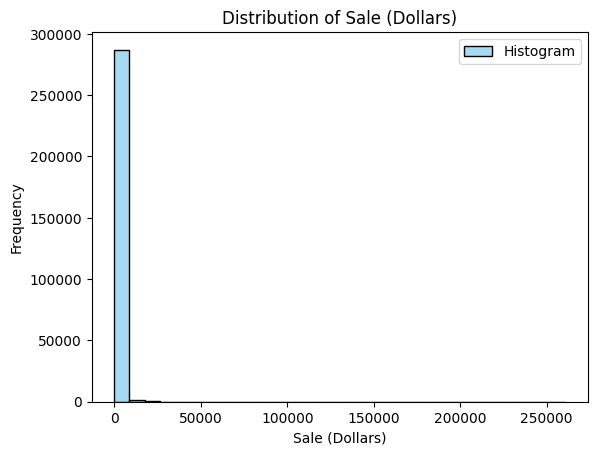


**考察:**
- Sale (Dollars)の分布は右に歪んでおり、データの大部分は低い値に集中しています。
  - Sale (Dollars)が低い値である場合が多いことを示唆しています。

Sale (Dollars)の第1四分位数 (Q1): 71.94
Sale (Dollars)の第3四分位数 (Q3): 315.0
Sale (Dollars)のIQR: 243.06
Sale (Dollars)の下限: -292.65000000000003, 上限: 679.59
Sale (Dollars)の外れ値:


,Date,Store Number,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
4,2022-08-16,4829,1022200.0,100% AGAVE TEQUILA,260.0,87280,CASAMIGOS BLANCO,750,60,2415.60,45.00,11.88
11,2022-08-15,4829,1081400.0,AMERICAN SCHNAPPS,65.0,82780,DEKUYPER BUTTERSHOTS PET,750,120,1215.60,90.00,23.77
44,2022-08-15,4829,1042100.0,IMPORTED DRY GINS,35.0,28233,BOMBAY SAPPHIRE GIN,1000,36,891.00,36.00,9.51
69,2022-08-15,4829,1082100.0,IMPORTED CORDIALS & LIQUEURS,85.0,64676,CHAMBORD LIQUEUR ROYALE DE FRANCE,750,24,720.00,18.00,4.75
85,2022-08-16,2633,1032100.0,IMPORTED VODKAS,260.0,34457,KETEL ONE,1000,48,1091.52,48.00,12.68
...,...,...,...,...,...,...,...,...,...,...,...,...
288674,2022-09-06,4829,1022100.0,MIXTO TEQUILA,434.0,87937,JUAREZ SILVER,1000,60,705.00,60.00,15.85
288680,2022-09-14,2500,1081600.0,WHISKEY LIQUEUR,421.0,64868,FIREBALL CINNAMON WHISKEY,1750,30,690.00,52.50,13.86
288696,2022-08-17,2633,1081600.0,WHISKEY LIQUEUR,620.0,85980,DOUGH BALL COOKIE DOUGH WHISKEY,750,27,710.37,20.25,5.34
288727,2022-08-15,2633,1012100.0,CANADIAN WHISKIES,260.0,11297,CROWN ROYAL,1000,60,1799.40,60.00,15.85


Sale (Dollars)の外れ値の件数: 35692
- Sale (Dollars)には外れ値が存在する可能性があります。
  - 外れ値は、データ入力ミス、特別なイベント、または異常な取引を示している可能性があります。
  - 外れ値の影響を分析し、必要に応じてデータを修正または除外することを検討してください。


In [26]:
# Sale (Dollars) (売上金額)
# 分布の形を確認するため
# 目的: 売上金額の分布を確認し、異常値（極端に高い売上やゼロ売上など）の有無を調べる。
# 期待する分布: 正の値が多く、ゼロや負の値がないことを確認。

def detect_outliers_iqr(data, column, outlier_threshold=1.5, verbose=True):
    """
    IQR (四分位範囲) を用いて、指定された列の外れ値を検出する関数。

    Args:
        data (pd.DataFrame): 外れ値を検出したいデータフレーム。
        column (str): 外れ値を検出する対象の列名。
        outlier_threshold (float, optional): 外れ値検出の閾値。デフォルトは 1.5 です。
        verbose (bool, optional): 結果を表示するかどうか。デフォルトは True です。

    Returns:
        pd.DataFrame: 外れ値を含むデータフレーム。
    """

    # 第1四分位数 (Q1) と第3四分位数 (Q3) を計算
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # 四分位範囲 (IQR) を計算
    IQR = Q3 - Q1

    # 外れ値の境界を計算
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR

    # 外れ値を抽出
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # 結果を表示 (verbose が True の場合のみ)
    if verbose:
      print(f"{column}の第1四分位数 (Q1): {Q1}")
      print(f"{column}の第3四分位数 (Q3): {Q3}")
      print(f"{column}のIQR: {IQR}")
      print(f"{column}の下限: {lower_bound}, 上限: {upper_bound}")
      print(f"{column}の外れ値:")
      #print(outliers)
      display(outliers)
      print(f"{column}の外れ値の件数: {len(outliers)}")

    return outliers

def visualize_and_analyze_distribution(data: pd.DataFrame, column_name: str) -> None:
    """
    指定された列の分布をヒストグラムとカーネル密度推定で可視化し、
    動的に考察文章を出力する関数。

    Args:
        data (pd.DataFrame): 分析対象のデータを含むデータフレーム。
        column_name (str): 可視化・分析する対象の列名。

    Returns:
        None
    """

    # ヒストグラムとカーネル密度推定を描画
    fig, ax = plt.subplots()  # 描画するためのFigureとAxesオブジェクトを作成

    # ヒストグラムを描画
    sns.histplot(
        data[column_name],
        bins=30,  # ヒストグラムのビン数 (棒の数) を30に設定
        ax=ax,     # 描画するAxesオブジェクトを指定
        color='skyblue',  # ヒストグラムの棒の色をスカイブルーに設定
        label='Histogram',  # 凡例に表示するラベルを設定
        #alpha=0.5,  # 透明度を調整
    )

    # タイトルと軸ラベルを設定
    ax.set_title(f'Distribution of {column_name}')  # グラフのタイトルを設定
    ax.set_xlabel(column_name)                     # x軸のラベルを設定
    ax.set_ylabel('Frequency')                     # y軸のラベルを設定

    # 凡例を表示
    ax.legend()

    plt.show()  # グラフを表示

    # 考察を追加
    print("\n**考察:**")

    # 分布の形状に関する考察 (歪度を計算)
    skewness = data[column_name].skew()
    if skewness > 0.5:
        print(f"- {column_name}の分布は右に歪んでおり、データの大部分は低い値に集中しています。")
        print(f"  - {column_name}が低い値である場合が多いことを示唆しています。")  # 列名に合わせてメッセージを修正
    elif skewness < -0.5:
        print(f"- {column_name}の分布は左に歪んでおり、データの大部分は高い値に集中しています。")
        print(f"  - {column_name}が高い値である場合が多いことを示唆しています。")  # 列名に合わせてメッセージを修正
    else:
        print(f"- {column_name}の分布はほぼ対称です。")

    print()
    # 外れ値の有無に関する考察 (detect_outliers_iqr関数を再利用)
    outliers = detect_outliers_iqr(data, column_name)
    if not outliers.empty:
        print(f"- {column_name}には外れ値が存在する可能性があります。")
        print("  - 外れ値は、データ入力ミス、特別なイベント、または異常な取引を示している可能性があります。")
        print("  - 外れ値の影響を分析し、必要に応じてデータを修正または除外することを検討してください。")
    else:
        print(f"- {column_name}には外れ値は検出されませんでした。")

# 売上金額の分析
visualize_and_analyze_distribution(sales_data, 'Sale (Dollars)')

※上記補足
- IQR（四分位範囲）とは？
 - 四分位範囲 (IQR) は、データの分布を理解するための統計指標です。
 - データを小さい順に並べたとき：
   - Q1（第1四分位数）: データの下位25%の値（全データの25%がこれより小さい）。
   - Q3（第3四分位数）: データの上位25%の値（全データの75%がこれより小さい）。
   - IQR = Q3 - Q1：データの中央50%がどれだけ広がっているかを示します。
- 外れ値を検出する基準
  - IQRを用いて外れ値を定義します。
  - 外れ値とは: 通常はデータ分布の中心から極端に外れた値を指します。 一般的に、以下の範囲外にある値を外れ値とみなします：
    - 下限（Lower Bound）: Q1 - 1.5 × IQR
    - 上限（Upper Bound）: Q3 + 1.5 × IQR
  - 範囲外の値:
    - 下限より小さい値や上限より大きい値が外れ値として扱われます。
- 注意点:
  - 外れ値が本当に異常かどうかはデータの文脈に依存します。
    - ビジネス上の正当な値であれば除外するべきではありません。
    - 例: 特定商品が大量購入された場合、それは重要な情報です。
→今回は文脈不明のため、そのままにする。実際におきた売買であれば残した方が良い。

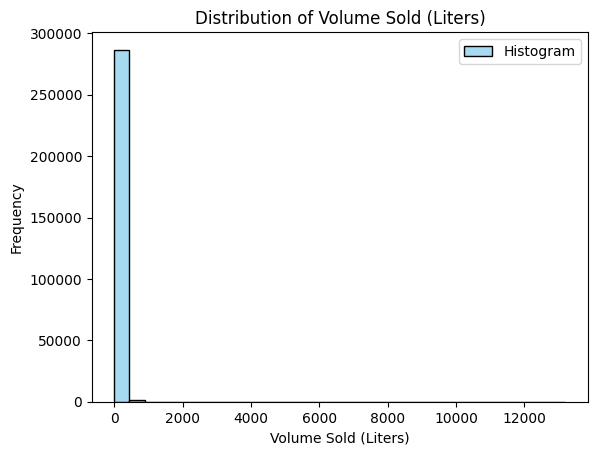


**考察:**
- Volume Sold (Liters)の分布は右に歪んでおり、データの大部分は低い値に集中しています。
  - Volume Sold (Liters)が低い値である場合が多いことを示唆しています。

Volume Sold (Liters)の第1四分位数 (Q1): 3.0
Volume Sold (Liters)の第3四分位数 (Q3): 13.5
Volume Sold (Liters)のIQR: 10.5
Volume Sold (Liters)の下限: -12.75, 上限: 29.25
Volume Sold (Liters)の外れ値:


,Date,Store Number,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
1,2022-08-16,4829,1071000.0,COCKTAILS/RTD,421.0,57051,BARTON LONG ISLAND ICED TEA,1000,36,221.40,36.0,9.51
2,2022-08-15,4829,1031100.0,AMERICAN VODKAS,380.0,37347,PHILLIPS VODKA,1000,60,386.40,60.0,15.85
4,2022-08-16,4829,1022200.0,100% AGAVE TEQUILA,260.0,87280,CASAMIGOS BLANCO,750,60,2415.60,45.0,11.88
11,2022-08-15,4829,1081400.0,AMERICAN SCHNAPPS,65.0,82780,DEKUYPER BUTTERSHOTS PET,750,120,1215.60,90.0,23.77
32,2022-08-15,2633,1031100.0,AMERICAN VODKAS,777.0,36874,BLUE OX VODKA,1000,36,251.28,36.0,9.51
...,...,...,...,...,...,...,...,...,...,...,...,...
288643,2022-01-26,2500,1031100.0,AMERICAN VODKAS,229.0,37258,GOTCHA VODKA,1000,36,189.00,36.0,9.51
288674,2022-09-06,4829,1022100.0,MIXTO TEQUILA,434.0,87937,JUAREZ SILVER,1000,60,705.00,60.0,15.85
288680,2022-09-14,2500,1081600.0,WHISKEY LIQUEUR,421.0,64868,FIREBALL CINNAMON WHISKEY,1750,30,690.00,52.5,13.86
288692,2022-08-16,2633,1031100.0,AMERICAN VODKAS,229.0,37258,GOTCHA VODKA,1000,120,630.00,120.0,31.70


Volume Sold (Liters)の外れ値の件数: 39125
- Volume Sold (Liters)には外れ値が存在する可能性があります。
  - 外れ値は、データ入力ミス、特別なイベント、または異常な取引を示している可能性があります。
  - 外れ値の影響を分析し、必要に応じてデータを修正または除外することを検討してください。


In [27]:
# Volume Sold (Liters) (販売量リットル)
# 目的: 販売量の分布を確認し、異常に大きいまたは小さい値があるかをチェック。
# 期待する分布: 正の範囲に集中する分布。

# 販売量（リットル）の分析
visualize_and_analyze_distribution(sales_data, 'Volume Sold (Liters)')

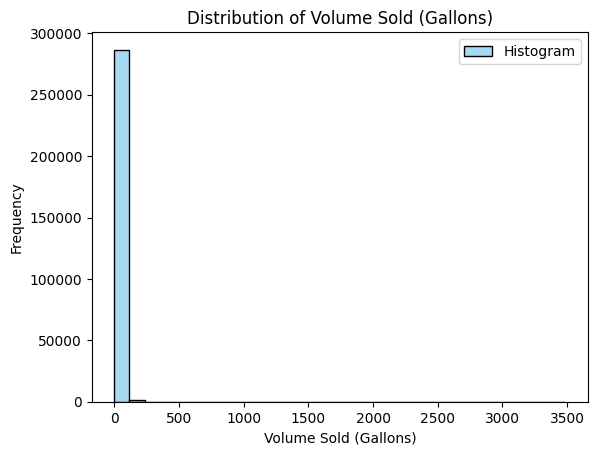


**考察:**
- Volume Sold (Gallons)の分布は右に歪んでおり、データの大部分は低い値に集中しています。
  - Volume Sold (Gallons)が低い値である場合が多いことを示唆しています。

Volume Sold (Gallons)の第1四分位数 (Q1): 0.79
Volume Sold (Gallons)の第3四分位数 (Q3): 3.56
Volume Sold (Gallons)のIQR: 2.77
Volume Sold (Gallons)の下限: -3.365, 上限: 7.715
Volume Sold (Gallons)の外れ値:


,Date,Store Number,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
1,2022-08-16,4829,1071000.0,COCKTAILS/RTD,421.0,57051,BARTON LONG ISLAND ICED TEA,1000,36,221.40,36.0,9.51
2,2022-08-15,4829,1031100.0,AMERICAN VODKAS,380.0,37347,PHILLIPS VODKA,1000,60,386.40,60.0,15.85
4,2022-08-16,4829,1022200.0,100% AGAVE TEQUILA,260.0,87280,CASAMIGOS BLANCO,750,60,2415.60,45.0,11.88
11,2022-08-15,4829,1081400.0,AMERICAN SCHNAPPS,65.0,82780,DEKUYPER BUTTERSHOTS PET,750,120,1215.60,90.0,23.77
32,2022-08-15,2633,1031100.0,AMERICAN VODKAS,777.0,36874,BLUE OX VODKA,1000,36,251.28,36.0,9.51
...,...,...,...,...,...,...,...,...,...,...,...,...
288643,2022-01-26,2500,1031100.0,AMERICAN VODKAS,229.0,37258,GOTCHA VODKA,1000,36,189.00,36.0,9.51
288674,2022-09-06,4829,1022100.0,MIXTO TEQUILA,434.0,87937,JUAREZ SILVER,1000,60,705.00,60.0,15.85
288680,2022-09-14,2500,1081600.0,WHISKEY LIQUEUR,421.0,64868,FIREBALL CINNAMON WHISKEY,1750,30,690.00,52.5,13.86
288692,2022-08-16,2633,1031100.0,AMERICAN VODKAS,229.0,37258,GOTCHA VODKA,1000,120,630.00,120.0,31.70


Volume Sold (Gallons)の外れ値の件数: 39126
- Volume Sold (Gallons)には外れ値が存在する可能性があります。
  - 外れ値は、データ入力ミス、特別なイベント、または異常な取引を示している可能性があります。
  - 外れ値の影響を分析し、必要に応じてデータを修正または除外することを検討してください。


In [28]:
# Volume Sold (Gallons) (販売量ガロン)
# 目的: Volume Sold (Liters)と整合性があるかを調べるために販売量ガロンの分布も確認。

visualize_and_analyze_distribution(sales_data, 'Volume Sold (Gallons)')

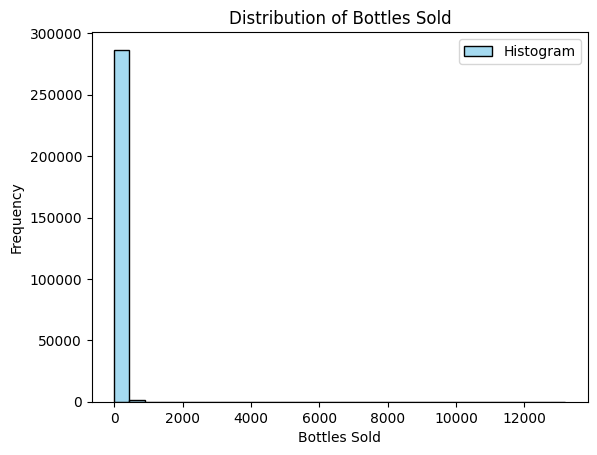


**考察:**
- Bottles Soldの分布は右に歪んでおり、データの大部分は低い値に集中しています。
  - Bottles Soldが低い値である場合が多いことを示唆しています。

Bottles Soldの第1四分位数 (Q1): 4.0
Bottles Soldの第3四分位数 (Q3): 18.0
Bottles SoldのIQR: 14.0
Bottles Soldの下限: -17.0, 上限: 39.0
Bottles Soldの外れ値:


,Date,Store Number,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
2,2022-08-15,4829,1031100.0,AMERICAN VODKAS,380.0,37347,PHILLIPS VODKA,1000,60,386.40,60.0,15.85
4,2022-08-16,4829,1022200.0,100% AGAVE TEQUILA,260.0,87280,CASAMIGOS BLANCO,750,60,2415.60,45.0,11.88
11,2022-08-15,4829,1081400.0,AMERICAN SCHNAPPS,65.0,82780,DEKUYPER BUTTERSHOTS PET,750,120,1215.60,90.0,23.77
39,2022-08-16,4829,1092100.0,IMPORTED DISTILLED SPIRITS SPECIALTY,293.0,989215,SOOH JINRO CHAMISUL GRAPEFRUIT SOJU,375,100,450.00,37.5,9.90
45,2022-08-17,2190,1062400.0,SPICED RUM,260.0,43333,CAPTAIN MORGAN ORIGINAL SPICED PET,200,48,215.52,9.6,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
288637,2022-01-13,4829,1031200.0,AMERICAN FLAVORED VODKA,380.0,41604,UV GRAPE,750,48,504.00,36.0,9.51
288674,2022-09-06,4829,1022100.0,MIXTO TEQUILA,434.0,87937,JUAREZ SILVER,1000,60,705.00,60.0,15.85
288692,2022-08-16,2633,1031100.0,AMERICAN VODKAS,229.0,37258,GOTCHA VODKA,1000,120,630.00,120.0,31.70
288727,2022-08-15,2633,1012100.0,CANADIAN WHISKIES,260.0,11297,CROWN ROYAL,1000,60,1799.40,60.0,15.85


Bottles Soldの外れ値の件数: 32291
- Bottles Soldには外れ値が存在する可能性があります。
  - 外れ値は、データ入力ミス、特別なイベント、または異常な取引を示している可能性があります。
  - 外れ値の影響を分析し、必要に応じてデータを修正または除外することを検討してください。


In [29]:
# Bottles Sold (販売本数)
# 外れ値や分布範囲を確認するため
# 目的: 販売本数の外れ値（極端に大きいまたは小さい値）を確認。
# 期待する分布: 本数がゼロ以上で、極端な外れ値が少ない。

visualize_and_analyze_distribution(sales_data, 'Bottles Sold')

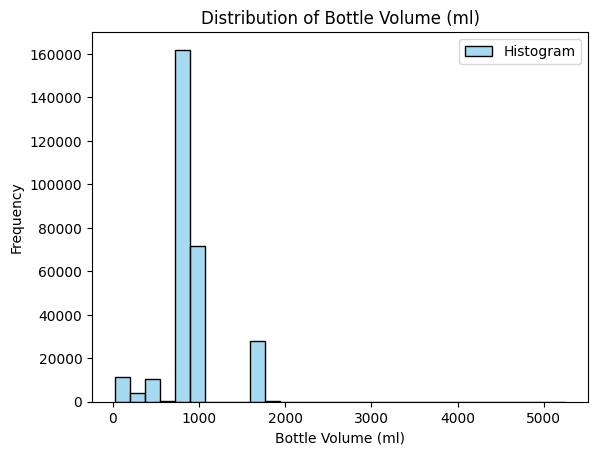


**考察:**
- Bottle Volume (ml)の分布は右に歪んでおり、データの大部分は低い値に集中しています。
  - Bottle Volume (ml)が低い値である場合が多いことを示唆しています。

Bottle Volume (ml)の第1四分位数 (Q1): 750.0
Bottle Volume (ml)の第3四分位数 (Q3): 1000.0
Bottle Volume (ml)のIQR: 250.0
Bottle Volume (ml)の下限: 375.0, 上限: 1375.0
Bottle Volume (ml)の外れ値:


,Date,Store Number,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
5,2022-08-15,2190,1081600.0,WHISKEY LIQUEUR,421.0,101515,FIREBALL CINNAMON WHISKEY KEG,5250,1,138.00,5.25,1.38
13,2022-08-12,2190,1032100.0,IMPORTED VODKAS,370.0,34003,ABSOLUT SWEDISH VODKA 80PRF,200,24,107.76,4.80,1.26
17,2022-08-17,2190,1011200.0,STRAIGHT BOURBON WHISKIES,65.0,27408,JIM BEAM HONEY MINI,50,2,21.00,0.10,0.02
18,2022-08-16,2190,1031100.0,AMERICAN VODKAS,301.0,38179,TITOS HANDMADE VODKA,200,24,125.76,4.80,1.26
28,2022-08-16,2190,1031100.0,AMERICAN VODKAS,380.0,37348,PHILLIPS VODKA,1750,6,68.40,10.50,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...
288701,2022-08-17,2190,1031100.0,AMERICAN VODKAS,301.0,38178,TITOS HANDMADE VODKA,1750,6,171.00,10.50,2.77
288707,2022-08-17,2190,1011200.0,STRAIGHT BOURBON WHISKIES,65.0,19478,MAKERS MARK,1750,1,51.00,1.75,0.46
288728,2022-08-17,4829,1012100.0,CANADIAN WHISKIES,260.0,10803,CROWN ROYAL REGAL APPLE MINI,50,50,746.50,2.50,0.66
288731,2022-08-16,2633,1012100.0,CANADIAN WHISKIES,260.0,11298,CROWN ROYAL,1750,6,305.94,10.50,2.77


Bottle Volume (ml)の外れ値の件数: 43797
- Bottle Volume (ml)には外れ値が存在する可能性があります。
  - 外れ値は、データ入力ミス、特別なイベント、または異常な取引を示している可能性があります。
  - 外れ値の影響を分析し、必要に応じてデータを修正または除外することを検討してください。


In [30]:
# Bottle Volume (ml) (ボトル容量)
# 目的: ボトル容量の異常な値（異常に大きいまたは小さい容量）が含まれていないか確認。

visualize_and_analyze_distribution(sales_data, 'Bottle Volume (ml)')


### 相関関係の解析

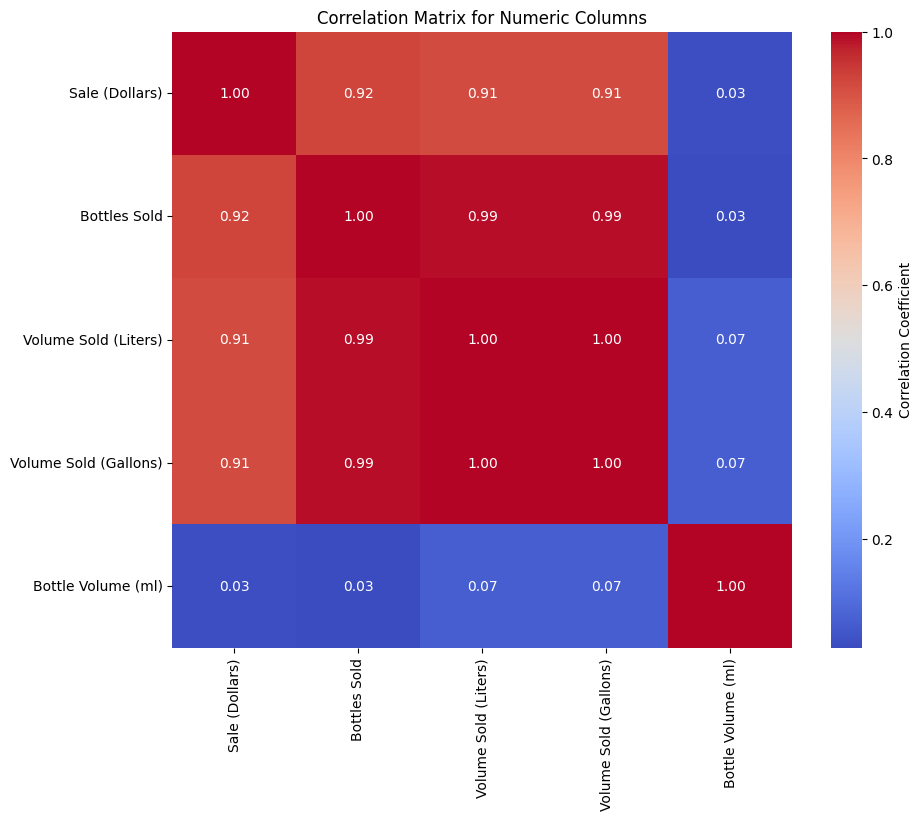

ヒートマップは correlation_matrix_heatmap.png に保存されました。

## 相関関係のサマリー:
- 強い正の相関:
  - Sale (Dollars) と Bottles Sold (0.92)
  - Sale (Dollars) と Volume Sold (Liters) (0.91)
  - Sale (Dollars) と Volume Sold (Gallons) (0.91)
  - Bottles Sold と Sale (Dollars) (0.92)
  - Bottles Sold と Volume Sold (Liters) (0.99)
  - Bottles Sold と Volume Sold (Gallons) (0.99)
  - Volume Sold (Liters) と Sale (Dollars) (0.91)
  - Volume Sold (Liters) と Bottles Sold (0.99)
  - Volume Sold (Liters) と Volume Sold (Gallons) (1.00)
  - Volume Sold (Gallons) と Sale (Dollars) (0.91)
  - Volume Sold (Gallons) と Bottles Sold (0.99)
  - Volume Sold (Gallons) と Volume Sold (Liters) (1.00)
- 強い負の相関は見つかりませんでした。

## 考察と示唆:
- **示唆:** Sale (Dollars) と Bottles Sold には強い正の相関 (0.92) があります。
  これは、販売本数の増加が売上金額の増加に大きく寄与していることを示唆しており、
  **データ分析の前提条件を満たしている**と考えられます。

     - **アクション:** 販売促進キャンペーンや新商品投入によって販売本数を増やし、
       売上増加を目指します。
       特定の商品が販売本数と売上の相関が高い場合は、
       その商品に焦点を当てた施策を検討します。

     - **注意点:** 販売本数以外の要因（例：価格、販促活動、季節性）も
     

In [31]:
def generate_insights_and_suggestions(correlation_matrix, numeric_columns, correlation_threshold=0.7):
    """
    相関行列に基づいて、考察と示唆を動的に生成する関数。
    ドメイン知識や予測モデル構築への視点を取り入れ、より具体的なアクションを提示するように改良。
    当たり前の相関関係への対応を追加。
    出力内容を適宜改行し、可読性を向上。

    Args:
        correlation_matrix (pd.DataFrame): 相関行列。
        numeric_columns (list): 数値型カラム名のリスト。
        correlation_threshold (float, optional): 相関の閾値。デフォルトは 0.7。

    Returns:
        list: 生成された考察と示唆のリスト。
    """
    insights_and_suggestions = []

    # 当たり前の相関を無視する組み合わせを定義
    obvious_correlations = {
        ('Volume Sold (Gallons)', 'Volume Sold (Liters)'),
        ('Volume Sold (Liters)', 'Volume Sold (Gallons)'),
        ('Sale (Dollars)', 'Bottles Sold'),
        ('Bottles Sold', 'Sale (Dollars)'),
        ('Sale (Dollars)', 'Volume Sold (Liters)'),
        ('Volume Sold (Liters)', 'Sale (Dollars)'),
        ('Sale (Dollars)', 'Volume Sold (Gallons)'),
        ('Volume Sold (Gallons)', 'Sale (Dollars)'),
        ('Bottles Sold', 'Volume Sold (Liters)'),
        ('Volume Sold (Liters)', 'Bottles Sold'),
        ('Bottles Sold', 'Volume Sold (Gallons)'),
        ('Volume Sold (Gallons)', 'Bottles Sold'),
    }

    # ルールベースの示唆生成
    for col1 in numeric_columns:
        for col2 in numeric_columns:
            if col1 != col2 and (col1, col2) not in obvious_correlations:
                correlation = correlation_matrix.loc[col1, col2]
                if abs(correlation) >= correlation_threshold:
                    # 正の相関の場合の示唆
                    if correlation > 0:
                        insights_and_suggestions.append(
                            f"- **示唆:** {col1} と {col2} には強い正の相関 ({correlation:.2f}) があります。\n"
                            f"  {col1} が増加すると、{col2} も増加する傾向があります。\n"
                            f"  例えば、{col1} を向上させる施策を打つことで、"
                            f"{col2} も向上する可能性があります。\n"
                        )
                    # 負の相関の場合の示唆
                    else:
                        insights_and_suggestions.append(
                            f"- **示唆:** {col1} と {col2} には強い負の相関 ({correlation:.2f}) があります。\n"
                            f"  {col1} が増加すると、{col2} は減少する傾向があります。\n"
                        )

    # 当たり前の相関関係について言及 (売上と販売本数)
    correlation_sales_bottles = correlation_matrix.loc['Sale (Dollars)', 'Bottles Sold']
    insights_and_suggestions.append(
        f"- **示唆:** Sale (Dollars) と Bottles Sold には強い正の相関 ({correlation_sales_bottles:.2f}) があります。\n"
        f"  これは、販売本数の増加が売上金額の増加に大きく寄与していることを示唆しており、\n"
        f"  **データ分析の前提条件を満たしている**と考えられます。\n"
    )
    insights_and_suggestions.append(
        "     - **アクション:** 販売促進キャンペーンや新商品投入によって販売本数を増やし、\n"
        "       売上増加を目指します。\n"
        "       特定の商品が販売本数と売上の相関が高い場合は、\n"
        "       その商品に焦点を当てた施策を検討します。\n"
    )
    insights_and_suggestions.append(
        "     - **注意点:** 販売本数以外の要因（例：価格、販促活動、季節性）も\n"
        "       売上金額に影響を与える可能性があるため、多角的な分析が必要です。\n"
    )

    # 予測モデル構築への視点
    insights_and_suggestions.append(
        "- **予測モデル構築の視点:** 相関が非常に強い特徴量同士は、\n"
        "  多重共線性の問題を引き起こす可能性があります。\n"
        "  予測モデルを構築する際には、相関の高い特徴量を1つに絞るか、\n"
        "  正則化などの手法を検討する必要があります。\n"
    )

    return insights_and_suggestions

def analyze_and_visualize_correlation(
        sales_data: pd.DataFrame,
        numeric_columns: list,
        output_path: str ="correlation_matrix_heatmap.png",
        correlation_threshold: float = 0.7  # 相関の閾値を設定
    ) -> None:
    """
    数値型カラム間の相関関係を解析し、ヒートマップとして可視化する関数。
    相関関係の結果を動的に取得し、考察文章を動的に作成する機能を追加。
    出力内容を簡潔にし、重要な示唆とアクションに焦点を当てるように修正。

    Args:
        sales_data (pd.DataFrame): 販売データを含むデータフレーム。
        numeric_columns (list): 相関関係を解析する数値型カラム名のリスト。
        output_path (str, optional): ヒートマップを保存するファイルパス。デフォルトは "correlation_matrix_heatmap.png"。
        correlation_threshold (float, optional): 相関の閾値。デフォルトは 0.7。

    Returns:
        None
    """

    # 数値型カラムを対象に相関行列を計算
    correlation_matrix = sales_data[numeric_columns].corr()

    # ヒートマップで相関を可視化
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        cbar_kws={'label': 'Correlation Coefficient'}  # カラーバーのラベルを設定
    )
    plt.title('Correlation Matrix for Numeric Columns')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"ヒートマップは {output_path} に保存されました。")

    # 結果のサマリー表示
    print("\n## 相関関係のサマリー:")
    strong_positive_correlations = []
    strong_negative_correlations = []

    for col1 in numeric_columns:
        for col2 in numeric_columns:
            if col1 != col2:
                correlation = correlation_matrix.loc[col1, col2]
                if correlation >= correlation_threshold:
                    strong_positive_correlations.append((col1, col2, correlation))
                elif correlation <= -correlation_threshold:
                    strong_negative_correlations.append((col1, col2, correlation))

    if strong_positive_correlations:
        print("- 強い正の相関:")
        for col1, col2, correlation in strong_positive_correlations:
            print(f"  - {col1} と {col2} ({correlation:.2f})")
    else:
        print("- 強い正の相関は見つかりませんでした。")

    if strong_negative_correlations:
        print("- 強い負の相関:")
        for col1, col2, correlation in strong_negative_correlations:
            print(f"  - {col1} と {col2} ({correlation:.2f})")
    else:
        print("- 強い負の相関は見つかりませんでした。")

    # 考察と示唆の生成
    insights_and_suggestions = generate_insights_and_suggestions(
        correlation_matrix, numeric_columns, correlation_threshold
    )

    # 考察と示唆の出力
    print("\n## 考察と示唆:")
    if insights_and_suggestions:
        for suggestion in insights_and_suggestions:
            print(suggestion)
    else:
        print("- 目立った相関関係は見つかりませんでした。他の変数との関係や、より詳細な分析が必要となる可能性があります。")

numeric_columns = ['Sale (Dollars)', 'Bottles Sold', 'Volume Sold (Liters)', 'Volume Sold (Gallons)', 'Bottle Volume (ml)']
analyze_and_visualize_correlation(sales_data, numeric_columns)

※上記補足
- 相関係数とは？
 - 相関係数は、2つの数値データ間の関係性（相関の強さと方向性）を表す指標です。
  - 値の範囲: 相関係数の値は -1 ～ 1 の間に収まります。
   - 1: 完全な正の相関（片方が増加すれば、もう片方も比例して増加）。
   - 0: 相関なし（関係性が見られない）。
   - -1: 完全な負の相関（片方が増加すれば、もう片方は比例して減少）。
  - データの関係性を示す指標:
   - 相関が高ければ（0.7以上や-0.7以下）、変数間に強い関係があると考えられます。例: Bottles SoldとVolume Sold (Liters)は強い正の相関が期待されます。
   - 低ければ（0.3未満や-0.3超）、それほど関係性は強くないことを示します。例: Bottle Volume (ml)が売上金額に与える影響が小さい場合、戦略的に重要ではないかもしれません。
- 相関関係で何を確認するのか？
 - 期待される結果:
   - 相関係数が高ければ、「販売本数が増えれば売上金額が増加する」という関係が示されます。
   - 低い相関係数や相関がない場合は、「販売本数が売上金額に影響を与えていない」可能性があります。
 - 異常データの確認
   - 相関が期待に反して非常に低い場合、データに異常がある可能性があります（例: 販売本数がゼロなのに売上が発生しているなど）。

特に注目したいカラムの組み合わせ

| **カラム1**          | **カラム2**              | **確認する関係性**                              |
|----------------------|--------------------------|----------------------------------------------|
| `Sale (Dollars)`     | `Bottles Sold`           | 販売本数が売上金額にどれだけ寄与しているか。   |
| `Bottles Sold`       | `Volume Sold (Liters)`   | 販売本数と販売量の整合性。                     |
| `Volume Sold (Liters)`| `Volume Sold (Gallons)` | リットルとガロンの値が適切に換算されているか。 |
| `Bottle Volume (ml)` | `Sale (Dollars)`         | ボトル容量が売上に与える影響。                 |


### カテゴリーデータの分析

                                      Category Sales  Percentage (%)
Category Name                                                       
AMERICAN VODKAS                          15836588.93       12.546701
100% AGAVE TEQUILA                       15127645.38       11.985033
STRAIGHT BOURBON WHISKIES                 9310742.38        7.376532
CANADIAN WHISKIES                         9128345.94        7.232026
IMPORTED CORDIALS & LIQUEURS              7155772.82        5.669235
MIXTO TEQUILA                             6318751.46        5.006096
IRISH WHISKIES                            5203638.93        4.122637
TENNESSEE WHISKIES                        4699814.28        3.723476
AMERICAN FLAVORED VODKA                   4599915.62        3.644331
SPICED RUM                                4507027.51        3.570739
IMPORTED FLAVORED VODKA                   4047953.10        3.207033
IMPORTED VODKAS                           3820417.13        3.026765
AMERICAN SCHNAPPS                 

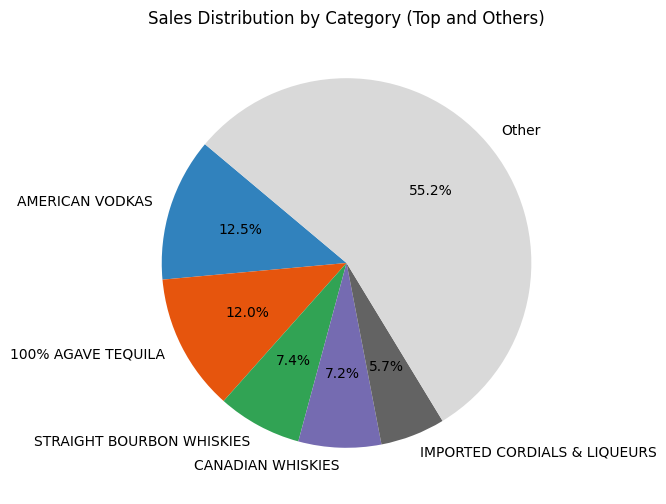

In [32]:
def analyze_category_sales(sales_data: pd.DataFrame) -> pd.DataFrame:
    """
    商品カテゴリ別の売上を分析し、円グラフで可視化し、詳細なインサイトを出力する関数。

    Args:
        sales_data (pd.DataFrame): 売上データを含むデータフレーム。

    Returns:
        pd.DataFrame: カテゴリー別売上集計結果を含むデータフレーム。
    """

    # 商品カテゴリごとの売上を集計
    category_sales = sales_data.groupby('Category Name')['Sale (Dollars)'].sum()

    # 全体売上に対する割合を計算
    total_sales = category_sales.sum()
    category_sales_percentage = (category_sales / total_sales) * 100

    # 売上データを降順にソート
    category_summary = pd.DataFrame({
        'Category Sales': category_sales,
        'Percentage (%)': category_sales_percentage
    }).sort_values(by='Category Sales', ascending=False)

    # 集計結果を表示
    print(category_summary)
    print("\n")  # 改行を追加

    # 売上上位カテゴリー
    top_category = category_summary.index[0]
    top_sales = category_summary.iloc[0]['Category Sales']
    top_percentage = category_summary.iloc[0]['Percentage (%)']
    print(f"**売上上位カテゴリー:** `{top_category}` カテゴリーが最も売上が高く、\n"
          f"売上金額は `{top_sales:,.0f}` ドルで、全体の `{top_percentage:.1f}%` を占めています。\n"
          f"**示唆:** {top_category}カテゴリーは、ビジネスの主要な収益源となっていると考えられます。\n"
          f"このカテゴリーの売上をさらに伸ばすために、\n"
          f"顧客のニーズに合わせた商品開発や販売促進活動が重要です。\n"
          f"また、競合他社の状況を分析し、\n"
          f"{top_category}カテゴリーにおける競争優位性を維持・強化する必要があります。\n")

    # 売上下位カテゴリー
    bottom_category = category_summary.index[-1]
    bottom_sales = category_summary.iloc[-1]['Category Sales']
    bottom_percentage = category_summary.iloc[-1]['Percentage (%)']
    print(f"**売上下位カテゴリー:** `{bottom_category}` カテゴリーが最も売上が低く、\n"
          f"売上金額は `{bottom_sales:,.0f}` ドルで、全体の `{bottom_percentage:.1f}%` を占めています。\n"
          f"**示唆:** {bottom_category}カテゴリーの売上は低迷しており、\n"
          f"ビジネスへの貢献度が低い可能性があります。\n"
          f"このカテゴリーの売上を向上させるためには、\n"
          f"顧客ニーズや市場動向を調査し、\n"
          f"商品ラインナップの見直しや販売戦略の変更などを検討する必要があります。\n"
          f"また、{bottom_category}カテゴリーの収益性や将来性を評価し、\n"
          f"事業継続の可否についても検討する必要があるかもしれません。\n")

    # カテゴリー数と売上分布
    num_categories = len(category_summary)
    top3_sales_percentage = category_summary.iloc[:3]['Percentage (%)'].sum()
    print(f"**カテゴリー数と売上分布:** 全 `{num_categories}` カテゴリーのうち、\n"
          f"上位 `3` カテゴリーで売上の `{top3_sales_percentage:.1f}%` を占めています。\n"
          f"**示唆:** 売上が特定のカテゴリーに集中しているため、\n"
          f"これらのカテゴリーの動向がビジネス全体に大きな影響を与える可能性があります。\n"
          f"上位カテゴリーの売上を維持・拡大するための戦略と並行して、\n"
          f"他のカテゴリーの売上を向上させるための施策も検討する必要があります。\n"
          f"これにより、リスク分散と収益基盤の強化を図ることが重要です。\n")

    # 特定カテゴリーへの言及 (例: Wine) - 具体的な分析と示唆を追加
    wine_sales_percentage = category_summary.loc['Wine', 'Percentage (%)'] if 'Wine' in category_summary.index else 0
    if wine_sales_percentage > 0:
        print(f"**特定カテゴリーへの言及:** `Wine` カテゴリーは売上全体の `{wine_sales_percentage:.1f}%` を占めており、\n"
              f"今後の成長が期待されます。\n"
              f"**示唆:** ワイン市場の成長トレンドや消費者の嗜好変化などを分析し、\n"
              f"新たな顧客層を獲得するための商品開発やマーケティング戦略を検討する必要があります。\n"
              f"また、競合他社のワイン販売状況や価格戦略を調査し、\n"
              f"Wineカテゴリーにおける競争力を強化する必要があります。\n")

    # 円グラフの描画 (上位とその他に分類)
    top_n = 5  # 上位表示するカテゴリー数
    top_categories = category_summary.head(top_n)
    other_sales = category_summary.iloc[top_n:]['Category Sales'].sum()  # 下位もOtherに含める
    other_percentage = category_summary.iloc[top_n:]['Percentage (%)'].sum() # 下位もOtherに含める

    # 円グラフ用データフレームを作成
    pie_data = pd.concat([
        top_categories,
        pd.DataFrame({'Category Sales': [other_sales], 'Percentage (%)': [other_percentage]}, index=['Other'])
    ])

    plt.figure(figsize=(10, 6))
    pie_data['Percentage (%)'].plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=140,
        colormap='tab20c',
        labels=pie_data.index
    )
    plt.title('Sales Distribution by Category (Top and Others)')  # タイトルを修正
    plt.ylabel('')  # Yラベルを非表示にする
    plt.show()

    return category_summary

# 関数を実行して分析結果を表示
category_summary_df = analyze_category_sales(sales_data)

              Store Sales  Percentage (%)                       Store Name
Store Number                                                              
2633          55203419.42       43.735478     HY-VEE #3 / BDI / DES MOINES
4829          51807358.98       41.044914                   CENTRAL CITY 2
2190           9256620.29        7.333653        CENTRAL CITY LIQUOR, INC.
2572           5439284.31        4.309329  HY-VEE FOOD STORE / CEDAR FALLS
2500           4514459.45        3.576627      HY-VEE FOOD STORE #1 / AMES


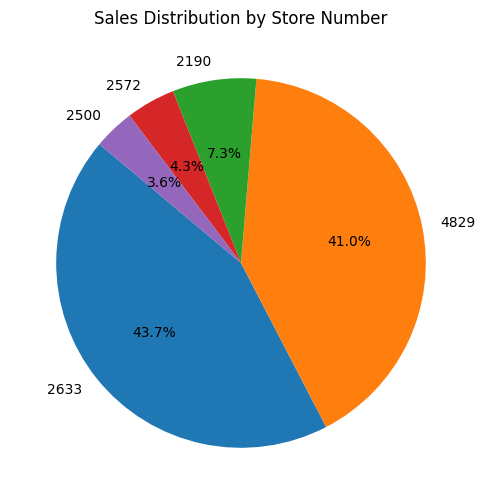


## EDAインサイト：店舗別売上分析

**売上上位店舗:** `店舗番号: 2633` (HY-VEE #3 / BDI / DES MOINES) が最も売上が高く、
売上金額は `55,203,419` ドルで、
全体の `43.7%` を占めています。
**示唆:** HY-VEE #3 / BDI / DES MOINES (店舗番号: 2633) の売上増加要因を分析し、
他の店舗にも適用できる施策を検討する必要があります。

**売上下位店舗:** `店舗番号: 2500` (HY-VEE FOOD STORE #1 / AMES) が最も売上が低く、
売上金額は `4,514,459` ドルで、
全体の `3.6%` を占めています。
**示唆:** HY-VEE FOOD STORE #1 / AMES (店舗番号: 2500) の売上低迷要因を分析し、
改善策を検討する必要があります。
立地、商品ラインナップ、顧客層などを
他の店舗と比較し、改善点を特定することが重要です。

**売上上位・下位の差:** 売上上位店舗と売上下位店舗の
売上金額の差は `50,688,960` ドル、
売上割合の差は `40.2`% です。
**示唆:** 店舗間の売上格差が大きい場合は、
その要因を分析し、格差を縮小するための施策を
検討する必要があります。
例えば、売上下位店舗の従業員教育を強化したり、
商品陳列方法を見直したりすることが考えられます。

**店舗数と売上集中度:** 全 `5` 店舗のうち、
上位 `3` 店舗で売上の `92.1%` を
占めています。
**示唆:** 売上が特定の店舗に集中している場合は、
リスク分散の観点から、
他の店舗の売上を向上させるための施策を
検討する必要があります。
例えば、地域ごとの販売促進キャンペーンを実施したり、
新たな顧客層を獲得するための
マーケティング活動を行うことが考えられます。



In [33]:
def analyze_store_sales_with_insights(sales_data, store_data):
    """
    店舗別の売上を分析し、円グラフで可視化、動的にインサイトを出力する関数。

    Args:
        sales_data (pd.DataFrame): 売上データを含むデータフレーム。
        store_data (pd.DataFrame): 店舗データを含むデータフレーム。

    Returns:
        None
    """
    # 1. 売上データと店舗データを結合 (店舗番号で結合)
    merged_data = pd.merge(sales_data, store_data[['Store Number', 'Store Name']], on='Store Number', how='left')

    # 2. 店舗番号ごとの売上を集計
    store_sales = merged_data.groupby('Store Number')['Sale (Dollars)'].sum()

    # 3. 全体売上に対する割合を計算
    total_sales = store_sales.sum()
    store_sales_percentage = (store_sales / total_sales) * 100

    # 4. 売上データを降順にソート
    store_summary = pd.DataFrame({
        'Store Sales': store_sales,
        'Percentage (%)': store_sales_percentage
    }).sort_values(by='Store Sales', ascending=False)

    # 5. 店舗名を追加
    store_summary = store_summary.reset_index() #reset_index()でインデックスを振り直して、Store Numberを列に戻す
    store_summary = pd.merge(store_summary, store_data[['Store Number', 'Store Name']], on='Store Number', how='left')
    store_summary.set_index('Store Number', inplace=True) # 店舗番号をインデックスに設定


    # 6. 集計結果を表示
    print(store_summary)

    # 7. 円グラフで売上割合を可視化 (店舗番号でラベル付け)
    plt.figure(figsize=(10, 6))
    store_summary['Percentage (%)'].plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=store_summary.index)
    plt.title('Sales Distribution by Store Number')
    plt.ylabel('')
    plt.show()

    # インサイトの出力
    print("\n## EDAインサイト：店舗別売上分析\n")

    # 売上上位店舗
    top_store_number = store_summary.index[0]
    top_store_name = store_summary.loc[top_store_number, 'Store Name']
    top_sales = store_summary.loc[top_store_number, 'Store Sales']
    top_percentage = store_summary.loc[top_store_number, 'Percentage (%)']

    print(f"**売上上位店舗:** `店舗番号: {top_store_number}` ({top_store_name}) が最も売上が高く、\n"
          f"売上金額は `{top_sales:,.0f}` ドルで、\n"
          f"全体の `{top_percentage:.1f}%` を占めています。\n"
          f"**示唆:** {top_store_name} (店舗番号: {top_store_number}) の売上増加要因を分析し、\n"
          f"他の店舗にも適用できる施策を検討する必要があります。\n")

    # 売上下位店舗
    bottom_store_number = store_summary.index[-1]
    bottom_store_name = store_summary.loc[bottom_store_number, 'Store Name']
    bottom_sales = store_summary.loc[bottom_store_number, 'Store Sales']
    bottom_percentage = store_summary.loc[bottom_store_number, 'Percentage (%)']

    print(f"**売上下位店舗:** `店舗番号: {bottom_store_number}` ({bottom_store_name}) が最も売上が低く、\n"
          f"売上金額は `{bottom_sales:,.0f}` ドルで、\n"
          f"全体の `{bottom_percentage:.1f}%` を占めています。\n"
          f"**示唆:** {bottom_store_name} (店舗番号: {bottom_store_number}) の売上低迷要因を分析し、\n"
          f"改善策を検討する必要があります。\n"
          f"立地、商品ラインナップ、顧客層などを\n"
          f"他の店舗と比較し、改善点を特定することが重要です。\n")

    # 売上上位・下位の差
    sales_diff = top_sales - bottom_sales
    sales_diff_percentage = top_percentage - bottom_percentage
    print(f"**売上上位・下位の差:** 売上上位店舗と売上下位店舗の\n"
          f"売上金額の差は `{sales_diff:,.0f}` ドル、\n"
          f"売上割合の差は `{sales_diff_percentage:.1f}`% です。\n"
          f"**示唆:** 店舗間の売上格差が大きい場合は、\n"
          f"その要因を分析し、格差を縮小するための施策を\n"
          f"検討する必要があります。\n"
          f"例えば、売上下位店舗の従業員教育を強化したり、\n"
          f"商品陳列方法を見直したりすることが考えられます。\n")

    # 店舗数と売上集中度
    num_stores = len(store_summary)
    top3_sales_percentage = store_summary.iloc[:3]['Percentage (%)'].sum()
    print(f"**店舗数と売上集中度:** 全 `{num_stores}` 店舗のうち、\n"
          f"上位 `3` 店舗で売上の `{top3_sales_percentage:.1f}%` を\n"
          f"占めています。\n"
          f"**示唆:** 売上が特定の店舗に集中している場合は、\n"
          f"リスク分散の観点から、\n"
          f"他の店舗の売上を向上させるための施策を\n"
          f"検討する必要があります。\n"
          f"例えば、地域ごとの販売促進キャンペーンを実施したり、\n"
          f"新たな顧客層を獲得するための\n"
          f"マーケティング活動を行うことが考えられます。\n")

analyze_store_sales_with_insights(sales_data, store_data)

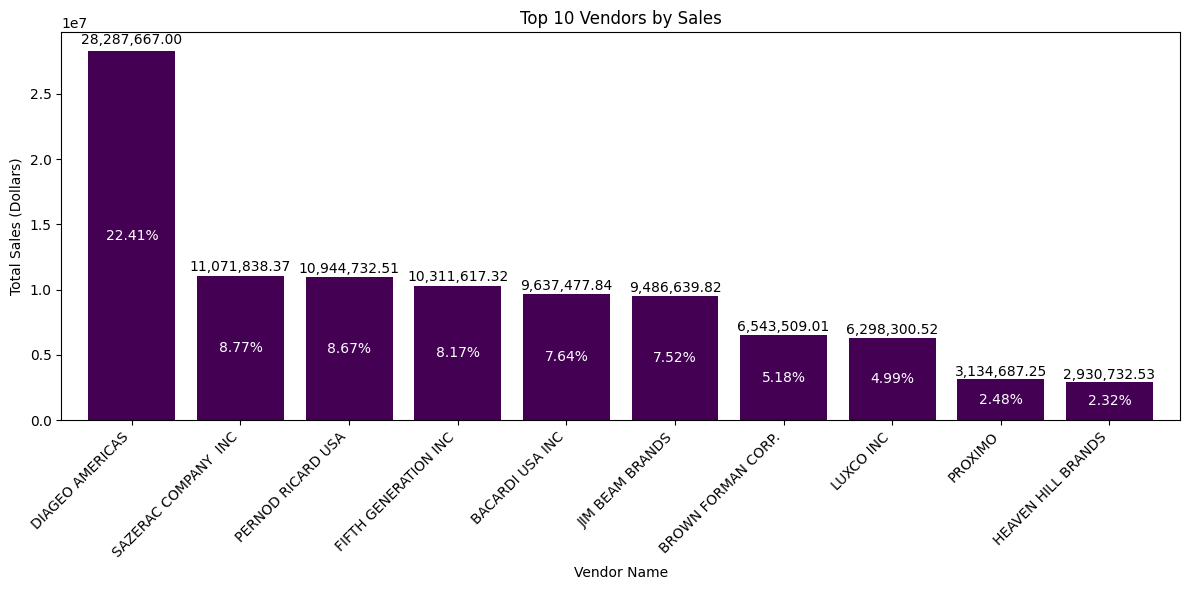


## EDAインサイト：ベンダー別売上分析

**売上上位ベンダー:** `DIAGEO AMERICAS` が最も売上が高く、
売上金額は `28,287,667` ドルで、全体の `22.4%` を占めています。
**示唆:** DIAGEO AMERICAS への依存度が高い可能性があります。
他のベンダーとの関係も見直し、リスク分散を検討する必要があるかもしれません。

**売上下位ベンダー:** `KINGS COUNTY DISTILLERY` が最も売上が低く、
売上金額は `29` ドルで、全体の `0.0%` を占めています。
**示唆:** KINGS COUNTY DISTILLERY との取引状況を分析し、
売上向上のための施策を検討する必要があるかもしれません。
取引量の増加や、新たな商品の導入などを検討できます。

**売上集中度:** 売上上位3社で全体の `39.9%` を占めています。
**示唆:** 特定のベンダーへの売上依存度が高い可能性があります。
リスク分散のため、他のベンダーとの取引拡大も検討する必要があるかもしれません。



In [34]:
# ベンダー分析
# どのベンダーが最も大きな売上に貢献しているのか、逆に貢献が少ないベンダーはどこかを把握。

def visualize_top_10_vendors(sales_data, vendor_data):
    """
    売上上位10社のベンダーを抽出し、棒グラフで可視化する関数。
    売上金額と全体割合をグラフ上に表示し、インサイトを動的に生成・出力します。

    Args:
        sales_data (pd.DataFrame): 販売履歴データを含むデータフレーム。
        vendor_data (pd.DataFrame): ベンダーマスタデータを含むデータフレーム。

    Returns:
        None
    """
    # 'sales_data'とベンダーマスタを結合してベンダー名を追加
    merged_data = pd.merge(sales_data, vendor_data, on='Vendor Number', how='left')

    # ベンダー名ごとの売上を集計
    vendor_sales = merged_data.groupby('Vendor Name')['Sale (Dollars)'].sum()

    # 全体売上に対する割合を計算
    total_sales = vendor_sales.sum()
    vendor_sales_percentage = (vendor_sales / total_sales) * 100

    # 売上データを降順にソートして上位10件を抽出
    top_vendors = pd.DataFrame({
        'Vendor Sales': vendor_sales,
        'Percentage (%)': vendor_sales_percentage
    }).sort_values(by='Vendor Sales', ascending=False).head(10)

    # 棒グラフの描画
    plt.figure(figsize=(12, 6))
    ax = top_vendors['Vendor Sales'].plot(kind='bar', colormap='viridis', width=0.8)

    # 棒グラフに売上金額と全体割合を表示
    for i, value in enumerate(top_vendors['Vendor Sales']):
        # 売上金額を棒の上に表示
        ax.text(i, value + (value * 0.01), f'{value:,.2f}', ha='center', va='bottom', fontsize=10)
        # 全体割合を棒の中央に表示
        ax.text(i, value / 2, f'{top_vendors["Percentage (%)"].iloc[i]:.2f}%', color='white', ha='center', va='center', fontsize=10)

    # 軸とタイトルの設定
    ax.set_title('Top 10 Vendors by Sales')
    ax.set_xlabel('Vendor Name')
    ax.set_ylabel('Total Sales (Dollars)')
    ax.set_xticks(range(len(top_vendors.index)))
    ax.set_xticklabels(top_vendors.index, rotation=45, ha='right')  # rotationでラベルを回転

    plt.tight_layout()  # ラベルが重ならないように調整
    plt.show()

    # インサイトの出力
    print("\n## EDAインサイト：ベンダー別売上分析\n")

    # 売上上位ベンダー
    top_vendor = top_vendors.index[0]
    top_sales = top_vendors.loc[top_vendor, 'Vendor Sales']
    top_percentage = top_vendors.loc[top_vendor, 'Percentage (%)']
    print(f"**売上上位ベンダー:** `{top_vendor}` が最も売上が高く、\n"
          f"売上金額は `{top_sales:,.0f}` ドルで、全体の `{top_percentage:.1f}%` を占めています。\n"
          f"**示唆:** {top_vendor} への依存度が高い可能性があります。\n"
          f"他のベンダーとの関係も見直し、リスク分散を検討する必要があるかもしれません。\n")

    # 売上下位ベンダー
    bottom_vendor = vendor_sales.idxmin()  # 全体で最も売上が低いベンダーを抽出
    bottom_sales = vendor_sales.loc[bottom_vendor]
    bottom_percentage = (bottom_sales / total_sales) * 100
    print(f"**売上下位ベンダー:** `{bottom_vendor}` が最も売上が低く、\n"
          f"売上金額は `{bottom_sales:,.0f}` ドルで、全体の `{bottom_percentage:.1f}%` を占めています。\n"
          f"**示唆:** {bottom_vendor} との取引状況を分析し、\n"
          f"売上向上のための施策を検討する必要があるかもしれません。\n"
          f"取引量の増加や、新たな商品の導入などを検討できます。\n")

    # 売上集中度
    top3_sales_percentage = top_vendors.iloc[:3]['Percentage (%)'].sum()
    print(f"**売上集中度:** 売上上位3社で全体の `{top3_sales_percentage:.1f}%` を占めています。\n"
          f"**示唆:** 特定のベンダーへの売上依存度が高い可能性があります。\n"
          f"リスク分散のため、他のベンダーとの取引拡大も検討する必要があるかもしれません。\n")

visualize_top_10_vendors(sales_data, vendor_data)

※上記補足：　le7は、数学的に10の7乗（10,000,000）

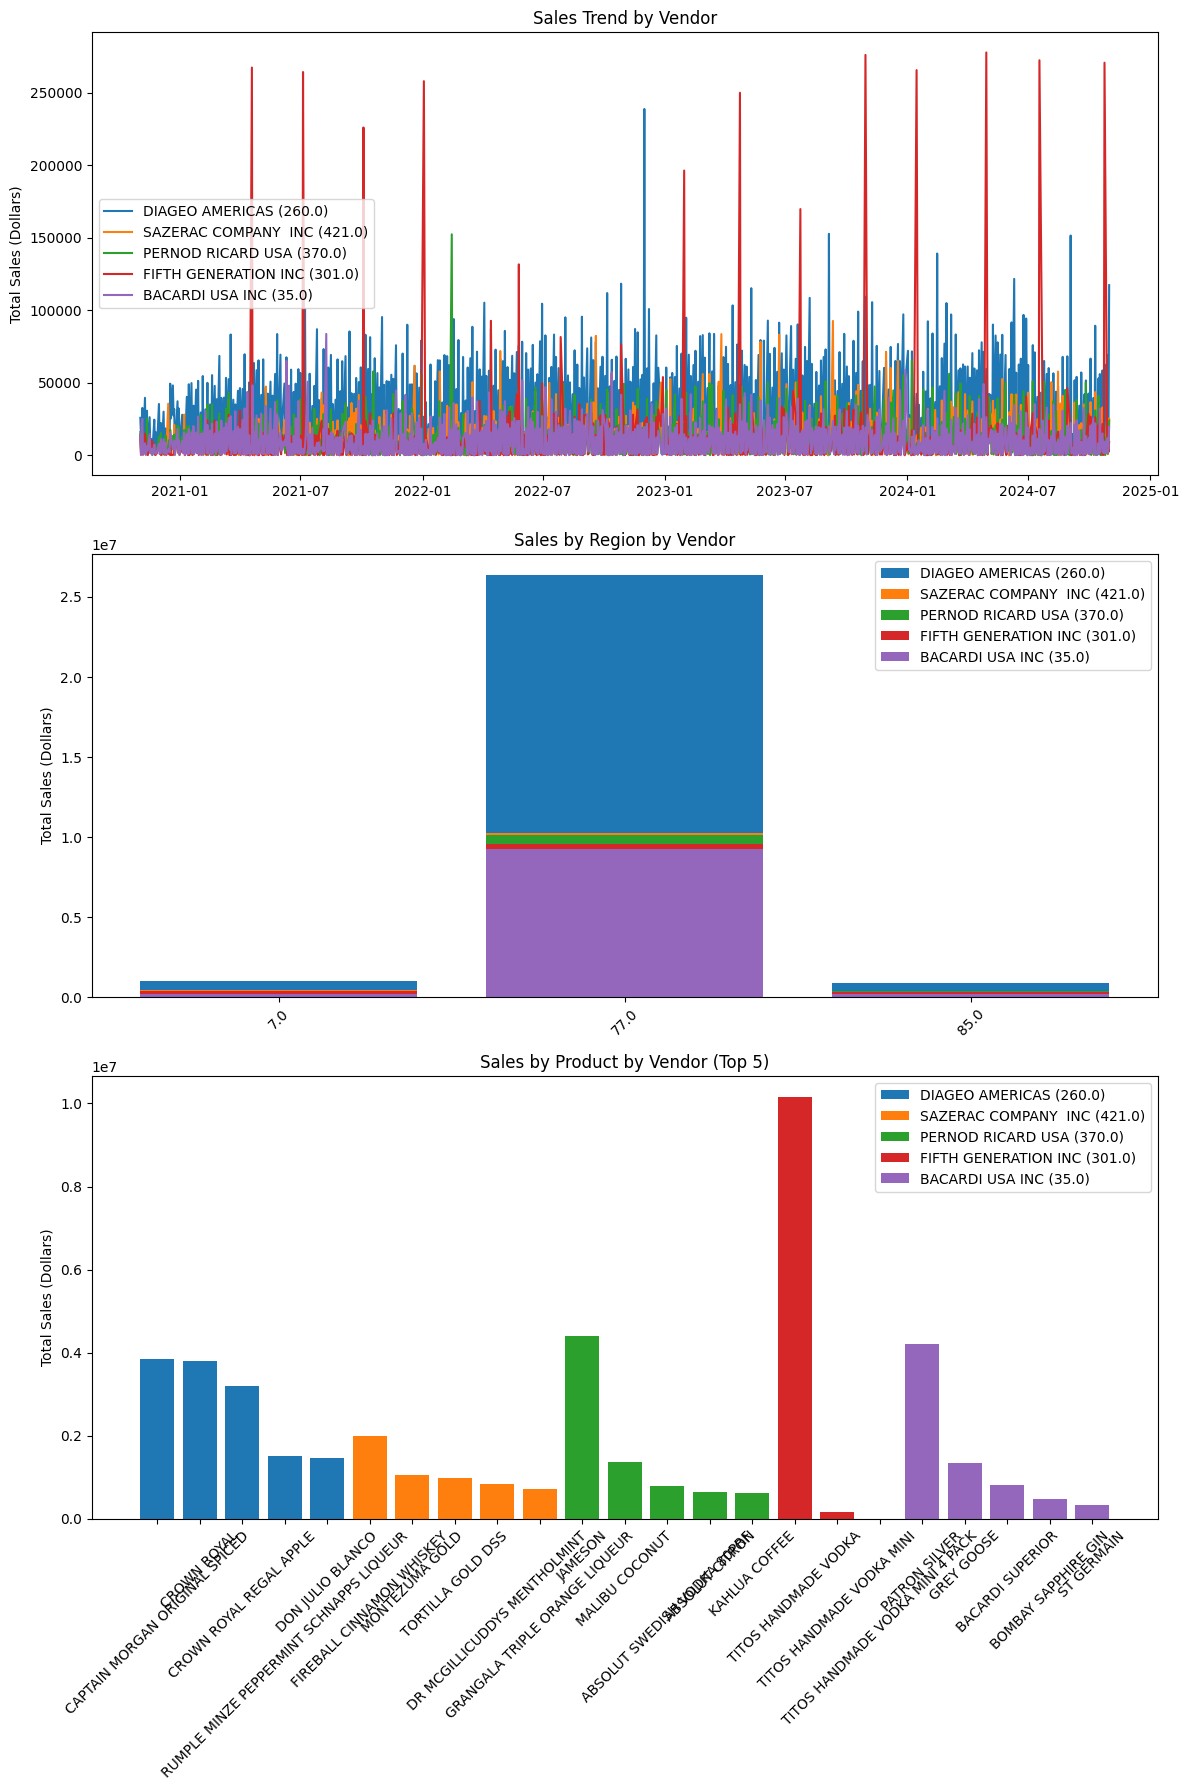


## 全体的な売上分析

### 全体トレンド
  - 全体的に増加傾向にあり、期間中の成長率は約95.6%です。
- BACARDI USA INC (35.0) の売上トレンドにおいて、上位10件の急上昇箇所は以下の通りです。
  2023年12月26日: 変化率 91215.83%
  2021年10月25日: 変化率 90121.90%
  2022年02月14日: 変化率 79059.07%
  2022年08月08日: 変化率 77610.62%
  2021年11月22日: 変化率 66047.57%
  2024年09月23日: 変化率 65769.17%
  2021年06月14日: 変化率 59236.45%
  2022年04月18日: 変化率 52971.47%
  2022年07月25日: 変化率 52747.51%
  2022年04月04日: 変化率 47028.79%
  これらの急上昇は、新商品の発売や販促キャンペーン、季節要因などが影響している可能性があります。
  詳細な調査を行い、急上昇の要因を特定することをお勧めします。
- **BACARDI USA INC (35.0) の売上トレンドにおいて、2023年12月26日に91215.83%という極端な上昇が見られました。**
- **BACARDI USA INC (35.0) の売上トレンドにおいて、2021年10月25日に90121.90%という極端な上昇が見られました。**
- **BACARDI USA INC (35.0) の売上トレンドにおいて、2022年02月14日に79059.07%という極端な上昇が見られました。**
- **BACARDI USA INC (35.0) の売上トレンドにおいて、2022年08月08日に77610.62%という極端な上昇が見られました。**
- **BACARDI USA INC (35.0) の売上トレンドにおいて、2021年11月22日に66047.57%という極端な上昇が見られました。**
- **BACARDI USA INC (35.0) の売上トレンドにおいて、2024年09月23日に65769.17%という極端な上昇が見られました。**
- **BACARDI USA INC (35.0) の売上トレンドにお

In [35]:
def visualize_vendor_sales_with_dynamic_insights(
    sales_data: pd.DataFrame,
    vendor_data: pd.DataFrame,
    store_data: pd.DataFrame
) -> None:
    """
    売上データ、ベンダーデータ、店舗データに基づいて、
    ベンダー別の売上分析と可視化を行い、動的なインサイトを出力する関数。

    Args:
        sales_data (pd.DataFrame): 販売履歴データを含むデータフレーム。
        vendor_data (pd.DataFrame): ベンダーマスタデータを含むデータフレーム。
        store_data (pd.DataFrame): 店舗マスタデータを含むデータフレーム。

    Returns:
        None
    """
    # store_data から 'County Number' 列も含めるように merge する
    merged_data = pd.merge(sales_data, vendor_data, on='Vendor Number', how='left')
    merged_data = pd.merge(merged_data, store_data[['Store Number', 'County Number', 'County']], on='Store Number', how='left')

    if merged_data['Date'].dtype == 'object':
        merged_data['Date'] = pd.to_datetime(merged_data['Date'], errors='coerce')

    # County Number と County の対応辞書を作成
    county_name_mapping = store_data.set_index('County Number')['County'].to_dict()

    # 売上上位5社のベンダー番号を取得
    top_vendor_numbers = merged_data.groupby('Vendor Number')['Sale (Dollars)'].sum().sort_values(ascending=False).head(5).index

    # 可視化とインサイト生成
    fig, axes = plt.subplots(3, 1, figsize=(12, 18))

    # 各ベンダーについてグラフにプロット
    for vendor_number in top_vendor_numbers:
        vendor_name = vendor_data[vendor_data['Vendor Number'] == vendor_number]['Vendor Name'].values[0]
        vendor_data_subset = merged_data[merged_data['Vendor Number'] == vendor_number]

        # 売上トレンド
        vendor_sales_trend = vendor_data_subset.groupby('Date')['Sale (Dollars)'].sum()
        axes[0].plot(vendor_sales_trend.index, vendor_sales_trend.values, label=f'{vendor_name} ({vendor_number})')

        # 地域別売上
        vendor_region_sales = vendor_data_subset.groupby('County Number')['Sale (Dollars)'].sum()
        axes[1].bar(vendor_region_sales.index.astype(str), vendor_region_sales.values, label=f'{vendor_name} ({vendor_number})')

        # 商品別売上 (上位5商品)
        vendor_product_sales = vendor_data_subset.groupby('Item Description')['Sale (Dollars)'].sum().sort_values(ascending=False).head(5)
        axes[2].bar(vendor_product_sales.index, vendor_product_sales.values, label=f'{vendor_name} ({vendor_number})')

    # グラフのタイトル、軸ラベル、凡例を設定
    axes[0].set_title('Sales Trend by Vendor')
    axes[0].set_ylabel('Total Sales (Dollars)')
    axes[0].legend()

    axes[1].set_title('Sales by Region by Vendor')
    axes[1].set_ylabel('Total Sales (Dollars)')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend()

    axes[2].set_title('Sales by Product by Vendor (Top 5)')
    axes[2].set_ylabel('Total Sales (Dollars)')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].legend()

    fig.tight_layout()  # グラフ間のスペースを調整
    plt.show()

    # インサイト出力 - 全体分析
    print("\n## 全体的な売上分析")

    # --- 全体トレンドの分析 ---
    overall_sales_monthly = sales_data.groupby(
        pd.Grouper(key='Date', freq='ME')  # freq='M' を freq='ME' に変更
    )['Sale (Dollars)'].sum()
    overall_sales_trend = overall_sales_monthly
    print("\n### 全体トレンド")
    if len(overall_sales_trend) >= 2:
        if overall_sales_trend.iloc[-1] > overall_sales_trend.iloc[0]:
            growth_rate = (overall_sales_trend.iloc[-1] - overall_sales_trend.iloc[0]) / overall_sales_trend.iloc[0] * 100
            print(f"  - 全体的に増加傾向にあり、期間中の成長率は約{growth_rate:.1f}%です。")
        elif overall_sales_trend.iloc[-1] < overall_sales_trend.iloc[0]:
            decline_rate = (overall_sales_trend.iloc[0] - overall_sales_trend.iloc[-1]) / overall_sales_trend.iloc[0] * 100
            print(f"  - 全体的に減少傾向にあり、期間中の減少率は約{decline_rate:.1f}%です。")
        else:
            print(f"  - 期間中の売上金額はほぼ横ばいです。")
    else:
        print(f"  - 売上データが不足しているため、トレンドを分析できません。")

    # 売上トレンドデータ
    vendor_sales_trend = vendor_data_subset.groupby('Date')['Sale (Dollars)'].sum()

    # 前日比の変化率を計算
    daily_change_rate = vendor_sales_trend.pct_change()

    # 変化率の絶対値でソートし、上位10件を抽出
    top_10_sudden_increases = daily_change_rate.abs().sort_values(ascending=False).head(10)

    # 考察文章に追加
    if not top_10_sudden_increases.empty:
        print(f"- {vendor_name} ({vendor_number}) の売上トレンドにおいて、上位10件の急上昇箇所は以下の通りです。")
        for date, change_rate in top_10_sudden_increases.items():
            print(f"  {date.strftime('%Y年%m月%d日')}: 変化率 {change_rate:.2%}")
        print("  これらの急上昇は、新商品の発売や販促キャンペーン、季節要因などが影響している可能性があります。")
        print("  詳細な調査を行い、急上昇の要因を特定することをお勧めします。")

    # 外れ値の基準を設定 (例: 変化率が100%以上)
    outlier_threshold = 1.0  # 1.0 = 100%

    # 基準を超える日付を抽出
    outlier_dates = top_10_sudden_increases[top_10_sudden_increases > outlier_threshold].index

    # 外れ値の可能性について考察文章に追加
    for outlier_date in outlier_dates:
        change_rate = top_10_sudden_increases.loc[outlier_date]
        print(f"- **{vendor_name} ({vendor_number}) の売上トレンドにおいて、{outlier_date.strftime('%Y年%m月%d日')}に{change_rate:.2%}という極端な上昇が見られました。**")
    if len(outlier_dates) > 0:
        print("  これはデータ入力ミス、システムエラー、クリスマス商戦明けの返品などの特殊なイベントが原因である可能性があります。")
        print("  今後の予測モデル作成においては、このデータポイントを**外れ値として削除または置換する**などの対応が必要となる可能性があります。")
        print("  データサイエンティストが、モデル作成時に詳細な検討を行うものとします。")

    # --- 全体地域別売上の分析 ---
    print("\n### 全体地域別売上")
    overall_region_sales = merged_data.groupby('County Number')['Sale (Dollars)'].sum()
    top_region = overall_region_sales.idxmax()
    top_region_sales = overall_region_sales.max()
    bottom_region = overall_region_sales.idxmin()
    bottom_region_sales = overall_region_sales.min()
    print(f"  - 売上は地域によって差があり、{top_region}地域が最も高く({top_region_sales:,.0f}ドル)、\n{bottom_region}地域が最も低い({bottom_region_sales:,.0f}ドル)です。")
    # ... (地域別売上に関する詳細な分析結果を出力 - 例: 売上上位/下位地域など) ...

    # --- 全体商品別売上の分析 ---
    print("\n### 全体商品別売上")
    overall_product_sales = sales_data.groupby('Category Name')['Sale (Dollars)'].sum()
    top_product = overall_product_sales.idxmax()
    top_product_sales = overall_product_sales.max()
    bottom_product = overall_product_sales.idxmin()
    bottom_product_sales = overall_product_sales.min()
    print(f"  - 売上は商品カテゴリによって差があり、{top_product}カテゴリーが最も高く({top_product_sales:,.0f}ドル)、\n{bottom_product}カテゴリーが最も低い({bottom_product_sales:,.0f}ドル)です。")
    # ... (商品別売上に関する詳細な分析結果を出力 - 例: 売上上位/下位商品など) ...

    # インサイト出力 - ベンダー別分析
    print("\n## 売上上位ベンダー5社の売上分析")
    for vendor_number in top_vendor_numbers:
        vendor_name = vendor_data[vendor_data['Vendor Number'] == vendor_number]['Vendor Name'].values[0]
        print(f"## ベンダー別売上分析: {vendor_name} (Vendor Number: {vendor_number})")

        # --- ベンダーの売上トレンドを可視化 - 月次売上推移 ---
        vendor_sales_monthly = merged_data[merged_data['Vendor Number'] == vendor_number].groupby(
            pd.Grouper(key='Date', freq='ME')  # freq='M' を freq='ME' に変更
        )['Sale (Dollars)'].sum()
        sales_trend = vendor_sales_monthly

        print("\n#### トレンド")
        if len(sales_trend) >= 2:
            if sales_trend.iloc[-1] > sales_trend.iloc[0]:
                growth_rate = (sales_trend.iloc[-1] - sales_trend.iloc[0]) / sales_trend.iloc[0] * 100
                print(f"  - 全体的に増加傾向にあり、期間中の成長率は約{growth_rate:.1f}%です。")
            elif sales_trend.iloc[-1] < sales_trend.iloc[0]:
                decline_rate = (sales_trend.iloc[0] - sales_trend.iloc[-1]) / sales_trend.iloc[0] * 100
                print(f"  - 全体的に減少傾向にあり、期間中の減少率は約{decline_rate:.1f}%です。")
            else:
                print(f"  - 期間中の売上金額はほぼ横ばいです。")
        else:
            print(f"  - 売上データが不足しているため、トレンドを分析できません。")


        # 地域別売上分析
        print(f"### {vendor_name}の地域別売上分析")
        vendor_county_sales = merged_data[merged_data['Vendor Number'] == vendor_number].groupby('County Number')['Sale (Dollars)'].sum()
        top_county = vendor_county_sales.idxmax()
        bottom_county = vendor_county_sales.idxmin()
        top_county_sales = vendor_county_sales.loc[top_county]
        bottom_county_sales = vendor_county_sales.loc[bottom_county]

        print(f"- {vendor_name}の売上は、地域によって差があります。\n"
              f"  - 売上上位地域: {county_name_mapping.get(top_county, '不明')} ({top_county_sales:,.0f} ドル)\n"
              f"  - 売上下位地域: {county_name_mapping.get(bottom_county, '不明')} ({bottom_county_sales:,.0f} ドル)\n"
              f"  - 売上上位地域と売上下位地域の売上金額の差は、{top_county_sales - bottom_county_sales:,.0f} ドルです。\n"
              f"  - この差は、人口密度、経済状況、競合店の有無など、様々な要因によって生じている可能性があります。")

        # 商品別売上分析
        print(f"### {vendor_name}の商品別売上分析")
        vendor_item_sales = merged_data[merged_data['Vendor Number'] == vendor_number].groupby('Item Description')['Sale (Dollars)'].sum()
        top_item = vendor_item_sales.idxmax()
        bottom_item = vendor_item_sales.idxmin()
        top_item_sales = vendor_item_sales.loc[top_item]
        bottom_item_sales = vendor_item_sales.loc[bottom_item]

        print(f"- {vendor_name}の売上は、商品によっても差があります。\n"
              f"  - 売上上位商品: {top_item} ({top_item_sales:,.0f} ドル)\n"
              f"  - 売上下位商品: {bottom_item} ({bottom_item_sales:,.0f} ドル)\n"
              f"  - 売上上位商品と売上下位商品の売上金額の差は、{top_item_sales - bottom_item_sales:,.0f} ドルです。\n"
              f"  - この差は、商品の価格、人気度、季節性など、様々な要因によって生じている可能性があります。")

        print()

# 関数呼び出し例
visualize_vendor_sales_with_dynamic_insights(sales_data, vendor_data, store_data)

In [36]:
# データの数が多いので、インタラクティブプロットライブラリを使って拡大縮小

def visualize_vendor_sales_interactive(sales_data, vendor_data):
    """
    販売データとベンダーデータをもとに、ベンダー別の売上をインタラクティブな棒グラフで可視化します。

    Args:
        sales_data (pd.DataFrame): 販売履歴データを含むデータフレーム。
        vendor_data (pd.DataFrame): ベンダーマスタデータを含むデータフレーム。

    Returns:
        None
    """
    # 販売データとベンダーデータを結合してベンダー名を追加
    merged_data = pd.merge(sales_data, vendor_data, on='Vendor Number', how='left')

    # ベンダー名ごとの売上を集計
    vendor_sales = merged_data.groupby('Vendor Name')['Sale (Dollars)'].sum().reset_index()

    # 売上データを降順にソート
    vendor_sales = vendor_sales.sort_values(by='Sale (Dollars)', ascending=False)

    # インタラクティブな棒グラフ作成
    fig = px.bar(
        vendor_sales,
        x='Sale (Dollars)',
        y='Vendor Name',
        orientation='h',  # 横向き棒グラフ
        title='Sales by Vendor',  # グラフタイトル
        labels={'Sale (Dollars)': 'Total Sales (Dollars)', 'Vendor Name': 'Vendor Name'},  # 軸ラベル
        text='Sale (Dollars)'  # 棒グラフに表示する値
    )

    # 売上額を棒グラフに表示する際の書式設定 (カンマ区切り)
    fig.update_traces(texttemplate='%{text:,.2f}', textposition='outside')

    # グラフのレイアウト調整 (軸ラベル、ソート順、テーマ)
    fig.update_layout(
        xaxis_title='Total Sales (Dollars)',
        yaxis_title='Vendor Name',
        yaxis=dict(categoryorder='total ascending'),  # 売上額の降順でソート
        template='plotly_white'  # グラフテーマ
    )

    # グラフを表示
    fig.show()

visualize_vendor_sales_interactive(sales_data, vendor_data)

In [37]:
def analyze_county_sales_with_insights(
        sales_data: pd.DataFrame,
        store_data: pd.DataFrame
    ) -> Tuple[pd.DataFrame, str]:
    """
    郡別の売上を分析し、円グラフで可視化、さらに分析結果に基づいて動的にEDA考察文章を生成・出力する関数。

    Args:
        sales_data (pd.DataFrame): 販売履歴データを含むデータフレーム。
        store_data (pd.DataFrame): 店舗マスタデータを含むデータフレーム。

    Returns:
        Tuple[pd.DataFrame, str]: 郡別売上データとEDA考察文章を含むタプル。
    """
    # 販売履歴データと店舗マスタデータを結合して郡データを追加
    merged_data = pd.merge(sales_data, store_data, on='Store Number', how='left')

    # 郡（County）ごとの売上を集計
    county_sales = merged_data.groupby('County')['Sale (Dollars)'].sum().reset_index()

    # 全体売上に対する割合を計算
    total_sales = county_sales['Sale (Dollars)'].sum()
    county_sales['Percentage (%)'] = (county_sales['Sale (Dollars)'] / total_sales) * 100

    # 売上データを降順にソート
    county_sales = county_sales.sort_values(by='Sale (Dollars)', ascending=False)

    # 円グラフの作成
    fig = px.pie(
        county_sales,
        values='Sale (Dollars)',
        names='County',
        title='Sales Distribution by County',  # タイトルを英語に変更
        hover_data=['Percentage (%)'],
        labels={'Percentage (%)': 'Percentage of Total Sales'},  # ラベルを英語に変更
    )

    # パーセンテージ表示を調整
    fig.update_traces(
        textinfo='percent+label',
        texttemplate='%{label}: %{percent:.2f}%',  # パーセンテージ記号を追加
    )

    # グラフのデザイン調整
    fig.update_layout(template='plotly_white')

    # グラフを表示
    fig.show()

    # EDA考察文章の生成
    insights = []

    # 売上上位郡
    top_county = county_sales.iloc[0]['County']
    top_sales = county_sales.iloc[0]['Sale (Dollars)']
    top_percentage = county_sales.iloc[0]['Percentage (%)']
    insights.append(f"**売上上位郡:** `{top_county}` 郡が最も売上が高く、売上金額は `{top_sales:,.0f}` ドルで、全体の `{top_percentage:.1f}%` を占めています。")

    # 売上下位郡
    bottom_county = county_sales.iloc[-1]['County']
    bottom_sales = county_sales.iloc[-1]['Sale (Dollars)']
    bottom_percentage = county_sales.iloc[-1]['Percentage (%)']
    insights.append(f"**売上下位郡:** `{bottom_county}` 郡が最も売上が低く、売上金額は `{bottom_sales:,.0f}` ドルで、全体の `{bottom_percentage:.1f}%` を占めています。")

    # 売上上位・下位の差
    sales_diff = top_sales - bottom_sales
    sales_diff_percentage = top_percentage - bottom_percentage
    insights.append(f"**売上上位・下位の差:** 売上上位郡と売上下位郡の売上金額の差は `{sales_diff:,.0f}` ドル、売上割合の差は `{sales_diff_percentage:.1f}`% です。")

    # 郡数と売上集中度
    num_counties = len(county_sales)
    top3_sales_percentage = county_sales.iloc[:3]['Percentage (%)'].sum()
    insights.append(f"**郡数と売上集中度:** 全 `{num_counties}` 郡のうち、上位 `3` 郡で売上の `{top3_sales_percentage:.1f}%` を占めています。")

    # 考察文章を結合
    eda_insights = "\n".join(insights)

    return county_sales, eda_insights  # 郡別売上データとEDA考察文章を返す

county_sales_data, eda_insights_text = analyze_county_sales_with_insights(sales_data, store_data)

# EDA考察文章を出力
print("\n## EDA考察：郡別売上分析\n")
print(eda_insights_text)


## EDA考察：郡別売上分析

**売上上位郡:** `POLK` 郡が最も売上が高く、売上金額は `116,267,399` ドルで、全体の `92.1%` を占めています。
**売上下位郡:** `STORY` 郡が最も売上が低く、売上金額は `4,514,459` ドルで、全体の `3.6%` を占めています。
**売上上位・下位の差:** 売上上位郡と売上下位郡の売上金額の差は `111,752,939` ドル、売上割合の差は `88.5`% です。
**郡数と売上集中度:** 全 `3` 郡のうち、上位 `3` 郡で売上の `100.0%` を占めています。


In [38]:
def visualize_sales_by_zip_code_with_insights(
    sales_data: pd.DataFrame,
    store_data: pd.DataFrame
) -> Tuple[pd.DataFrame, str]:
    """
    販売データと店舗データをもとに、郵便番号別の売上を円グラフで可視化し、
    EDA考察文章を生成・出力する関数。

    Args:
        sales_data (pd.DataFrame): 販売履歴データを含むデータフレーム。
        store_data (pd.DataFrame): 店舗マスタデータを含むデータフレーム。

    Returns:
        Tuple[pd.DataFrame, str]: 郵便番号別売上データとEDA考察文章を含むタプル。
    """
    # 'sales_data'と'store_data'を結合して郵便番号データを追加
    merged_data = pd.merge(sales_data, store_data, on='Store Number', how='left')

    # 郵便番号（Zip Code）ごとの売上を集計
    zip_sales = merged_data.groupby('Zip Code')['Sale (Dollars)'].sum().reset_index()

    # 全体売上に対する割合を計算
    total_sales = zip_sales['Sale (Dollars)'].sum()
    zip_sales['Percentage (%)'] = (zip_sales['Sale (Dollars)'] / total_sales) * 100

    # 売上データを降順にソート
    zip_sales = zip_sales.sort_values(by='Sale (Dollars)', ascending=False)

    # 円グラフの作成
    fig = px.pie(
        zip_sales,
        values='Sale (Dollars)',
        names='Zip Code',
        title='Sales Distribution by Zip Code',
        hover_data=['Percentage (%)'],
        labels={'Percentage (%)': 'Percentage of Total Sales'},
    )

    # パーセンテージ表示を調整
    fig.update_traces(
        textinfo='percent+label',
        texttemplate='%{label}: %{percent:.2f}%',  # パーセンテージ記号を追加
    )

    # グラフのデザイン調整
    fig.update_layout(template='plotly_white')

    # グラフの表示
    fig.show()

    # EDA考察文章の生成
    insights = []

    # 売上上位郵便番号
    top_zip_code = zip_sales.iloc[0]['Zip Code']
    top_sales = zip_sales.iloc[0]['Sale (Dollars)']
    top_percentage = zip_sales.iloc[0]['Percentage (%)']
    insights.append(f"**売上上位郵便番号:** `{top_zip_code}` が最も売上が高く、売上金額は `{top_sales:,.0f}` ドルで、全体の `{top_percentage:.1f}%` を占めています。")

    # 売上下位郵便番号
    bottom_zip_code = zip_sales.iloc[-1]['Zip Code']
    bottom_sales = zip_sales.iloc[-1]['Sale (Dollars)']
    bottom_percentage = zip_sales.iloc[-1]['Percentage (%)']
    insights.append(f"**売上下位郵便番号:** `{bottom_zip_code}` が最も売上が低く、売上金額は `{bottom_sales:,.0f}` ドルで、全体の `{bottom_percentage:.1f}%` を占めています。")

    # 売上上位・下位の差
    sales_diff = top_sales - bottom_sales
    sales_diff_percentage = top_percentage - bottom_percentage
    insights.append(f"**売上上位・下位の差:** 売上上位郵便番号と売上下位郵便番号の売上金額の差は `{sales_diff:,.0f}` ドル、売上割合の差は `{sales_diff_percentage:.1f}`% です。")

    # 郵便番号数と売上集中度
    num_zip_codes = len(zip_sales)
    top3_sales_percentage = zip_sales.iloc[:3]['Percentage (%)'].sum()
    insights.append(f"**郵便番号数と売上集中度:** 全 `{num_zip_codes}` 郵便番号のうち、上位 `3` 郵便番号で売上の `{top3_sales_percentage:.1f}%` を占めています。")

    # 考察文章を結合
    eda_insights = "\n".join(insights)

    return zip_sales, eda_insights

zip_sales_data, eda_insights_text = visualize_sales_by_zip_code_with_insights(sales_data, store_data)

# EDA考察文章を出力
print("\n## EDA考察：郵便番号別売上分析\n")
print(eda_insights_text)


## EDA考察：郵便番号別売上分析

**売上上位郵便番号:** `50314.0` が最も売上が高く、売上金額は `61,063,979` ドルで、全体の `48.4%` を占めています。
**売上下位郵便番号:** `50010.0` が最も売上が低く、売上金額は `4,514,459` ドルで、全体の `3.6%` を占めています。
**売上上位・下位の差:** 売上上位郵便番号と売上下位郵便番号の売上金額の差は `56,549,520` ドル、売上割合の差は `44.8`% です。
**郵便番号数と売上集中度:** 全 `4` 郵便番号のうち、上位 `3` 郵便番号で売上の `96.4%` を占めています。


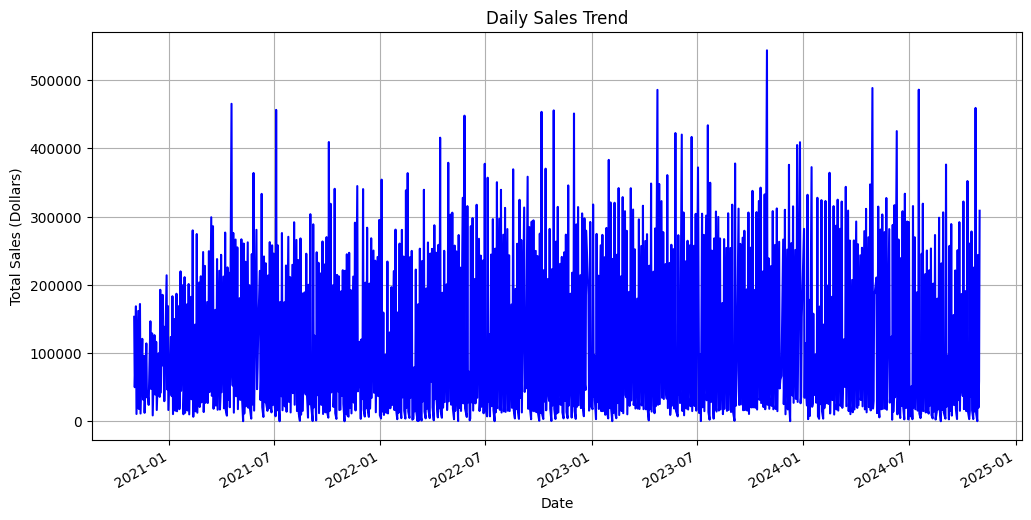


## EDA考察：日次売上トレンド分析

**売上ピーク期間:** `2023-10-30` に売上ピークがあり、売上金額は `543,490` ドルでした。
**売上最少期間:** `2021-10-31` に売上が最少で、売上金額は `68` ドルでした。
**売上トレンド:** 全体的に 増加傾向 が見られます。


In [39]:
def visualize_daily_sales_trend_with_insights(sales_data: pd.DataFrame) -> Tuple[pd.Series, str]:
    """
    日次売上金額のトレンドを可視化し、EDA考察文章を生成・出力する関数。

    Args:
        sales_data (pd.DataFrame): 売上データを含むデータフレーム。
                                  'Date'列と'Sale (Dollars)'列を含む必要がある。

    Returns:
        Tuple[pd.Series, str]: 日次売上データとEDA考察文章を含むタプル。
    """
    # 日次売上を集計
    daily_sales = sales_data.groupby('Date')['Sale (Dollars)'].sum()

    # プロット
    plt.figure(figsize=(12, 6))  # グラフのサイズを設定
    daily_sales.plot(kind='line', color='blue')  # 折れ線グラフで表示、色は青
    plt.title('Daily Sales Trend')  # グラフのタイトル (英語)
    plt.xlabel('Date')  # X軸のラベル (英語)
    plt.ylabel('Total Sales (Dollars)')  # Y軸のラベル (英語)
    plt.grid(True)  # グリッド線を表示
    plt.show()  # グラフを表示

    # EDA考察文章の生成
    insights = []

    # 売上ピーク期間
    peak_date = daily_sales.idxmax()
    peak_sales = daily_sales.max()
    insights.append(f"**売上ピーク期間:** `{peak_date.strftime('%Y-%m-%d')}` に売上ピークがあり、売上金額は `{peak_sales:,.0f}` ドルでした。")

    # 売上最少期間
    min_date = daily_sales.idxmin()
    min_sales = daily_sales.min()
    insights.append(f"**売上最少期間:** `{min_date.strftime('%Y-%m-%d')}` に売上が最少で、売上金額は `{min_sales:,.0f}` ドルでした。")

    # 売上トレンド
    overall_trend = "増加傾向" if daily_sales.iloc[-1] > daily_sales.iloc[0] else "減少傾向"  # iloc を使用
    insights.append(f"**売上トレンド:** 全体的に {overall_trend} が見られます。")

    # 季節性
    # 年間の売上データがないため（作ってないため）、ここでは季節性の考察は省略

    # 考察文章を結合
    eda_insights = "\n".join(insights)

    return daily_sales, eda_insights

daily_sales_data, eda_insights_text = visualize_daily_sales_trend_with_insights(sales_data)

# EDA考察文章を出力
print("\n## EDA考察：日次売上トレンド分析\n")
print(eda_insights_text)

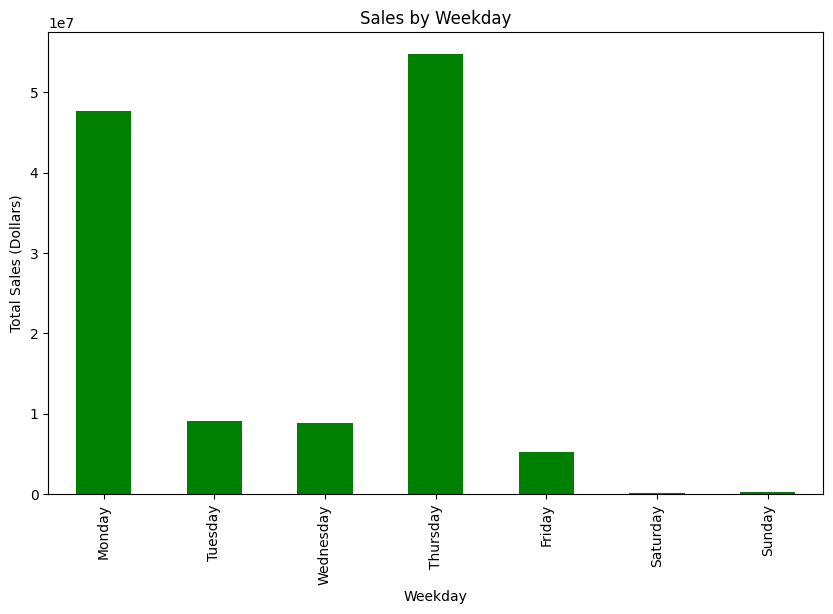


## EDA考察：曜日別売上分析

**売上最大の曜日:** Thursday (売上: 54,719,891 ドル)
**売上最小の曜日:** Saturday (売上: 138,935 ドル)
**平日売上:** 125,758,954 ドル
**週末売上:** 462,189 ドル
**平日の方が週末よりも売上が多い傾向があります。**
**外れ値:** Monday, Thursday の売上が、他の曜日に比べて極端に大きいです。
**週末の売上:** 土曜日と日曜日の売上が、平日に比べて非常に低いです。

## 考えられるアクション:

- Monday の売上増加要因を維持・強化 (例: 特定のキャンペーン/イベント効果)
- Monday の売上増加要因を他の曜日に適用
- Thursday の売上増加要因を維持・強化 (例: 特定のキャンペーン/イベント効果)
- Thursday の売上増加要因を他の曜日に適用
- 週末の集客増加のための施策を検討 (例: 週末限定割引、イベント開催)
- 週末の営業時間を変更 (例: 営業時間を延長)
- 週末の販売チャネルを拡大 (例: オンライン販売)


In [40]:
def visualize_sales_by_weekday(sales_data: pd.DataFrame, outlier_threshold=1.5) -> None:
    """
    販売データから曜日別の売上を計算し、棒グラフで可視化します。
    曜日別の売上傾向を分析し、考察文章を生成・出力します。
    IQRを用いて外れ値を検出し、対応策を提示します。
    週末の低値を検出し、対応策を提示します。
    外れ値を持つ曜日に対して、動的に示唆を提示します。
    外れ値検出の閾値を調整できるように outlier_threshold 引数を追加しました。


    Args:
        sales_data (pd.DataFrame): 販売データを含むデータフレーム。
                                  'Date' 列と 'Sale (Dollars)' 列を含む必要があります。

    Returns:
        None
    """
    # 曜日を抽出
    sales_data['Weekday'] = sales_data['Date'].dt.day_name()

    # 曜日別売上を集計
    weekday_sales = sales_data.groupby('Weekday')['Sale (Dollars)'].sum()

    # プロット
    plt.figure(figsize=(10, 6))
    weekday_sales = weekday_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    weekday_sales.plot(kind='bar', color='green')
    plt.title('Sales by Weekday')
    plt.xlabel('Weekday')
    plt.ylabel('Total Sales (Dollars)')
    plt.show()

    # 考察文章の生成
    insights = []
    actions = [] # アクション項目を格納するリスト

    # 売上最大・最小の曜日
    max_weekday = weekday_sales.idxmax()
    max_sales = weekday_sales.max()
    min_weekday = weekday_sales.idxmin()
    min_sales = weekday_sales.min()

    insights.append(f"**売上最大の曜日:** {max_weekday} (売上: {max_sales:,.0f} ドル)")
    insights.append(f"**売上最小の曜日:** {min_weekday} (売上: {min_sales:,.0f} ドル)")

    # 平日と週末の売上比較
    weekday_total_sales = weekday_sales.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].sum()
    weekend_total_sales = weekday_sales.loc[['Saturday', 'Sunday']].sum()

    insights.append(f"**平日売上:** {weekday_total_sales:,.0f} ドル")
    insights.append(f"**週末売上:** {weekend_total_sales:,.0f} ドル")

    if weekday_total_sales > weekend_total_sales:
        insights.append("**平日の方が週末よりも売上が多い傾向があります。**")
    else:
        insights.append("**週末の方が平日よりも売上が多い傾向があります。**")

    # detect_outliers_iqr 関数を使用して外れ値を検出
    outliers = detect_outliers_iqr(weekday_sales.reset_index(), 'Sale (Dollars)', outlier_threshold, False)
    outlier_weekdays = outliers['Weekday'].tolist()

    if outlier_weekdays:
        insights.append(f"**外れ値:** {', '.join(outlier_weekdays)} の売上が、他の曜日に比べて極端に大きいです。")  # 修正
        # 外れ値を持つ曜日それぞれに対する示唆を追加
        for weekday in outlier_weekdays:
            actions.append(f"- {weekday} の売上増加要因を維持・強化 (例: 特定のキャンペーン/イベント効果)")
            actions.append(f"- {weekday} の売上増加要因を他の曜日に適用")

    # 週末の低値の検出 (週末の売上が平日の平均より大幅に低い場合)
    if weekend_total_sales < weekday_total_sales * 0.5:  # 週末売上が平日の平均の50%未満
        insights.append("**週末の売上:** 土曜日と日曜日の売上が、平日に比べて非常に低いです。")
        actions.append("- 週末の集客増加のための施策を検討 (例: 週末限定割引、イベント開催)")
        actions.append("- 週末の営業時間を変更 (例: 営業時間を延長)")
        actions.append("- 週末の販売チャネルを拡大 (例: オンライン販売)")

    # 考察文章を出力
    print("\n## EDA考察：曜日別売上分析\n")
    print("\n".join(insights))

    # アクション項目を出力
    print("\n## 考えられるアクション:\n")
    print("\n".join(actions))

visualize_sales_by_weekday(sales_data, 0.5)

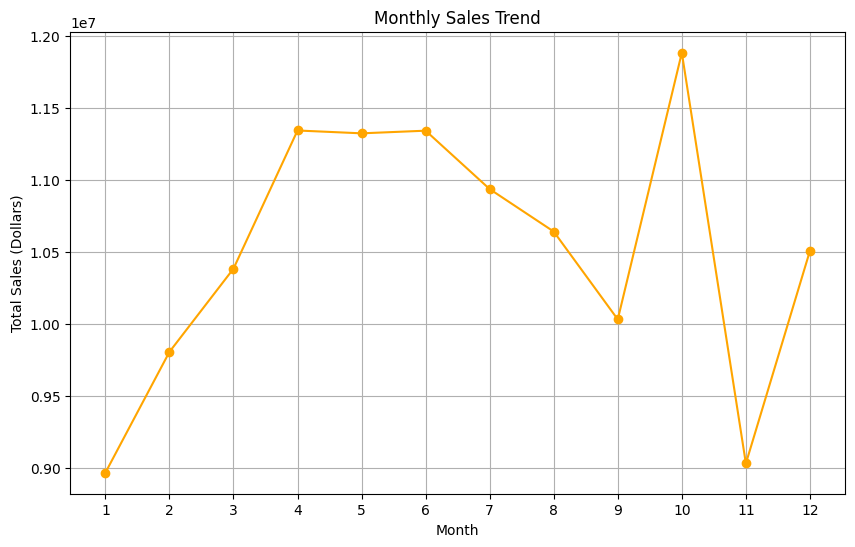

折れ線グラフは monthly_sales_trend.png に保存されました。


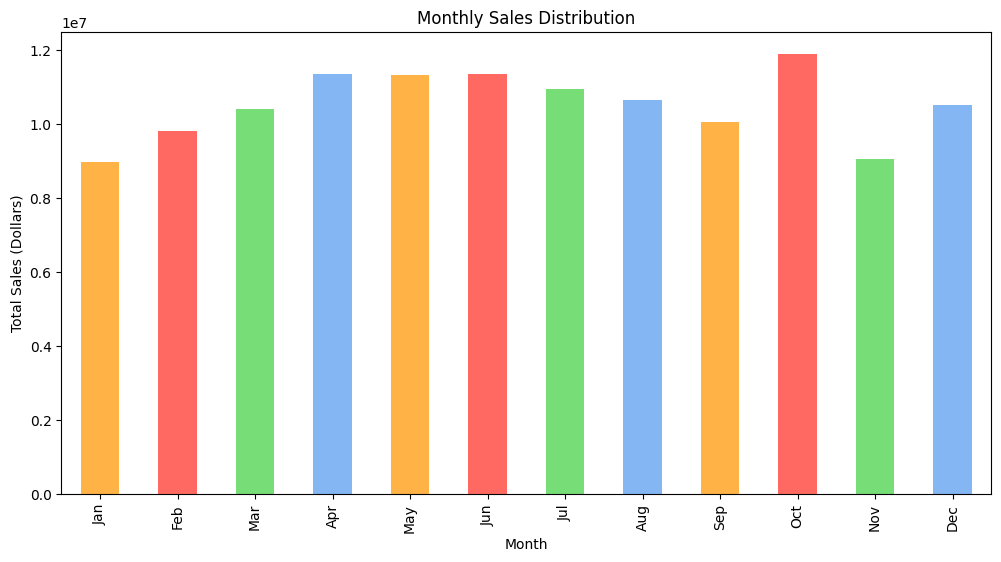


## 月ごとの売上トレンド分析

- 売上額が最も多い月は10月です。
- 売上額が最も少ない月は1月です。

- 売上には季節性が見られます。
  - 秋期 (9月～11月) に売上が増加する傾向があります。
    - 行楽シーズンやハロウィン、年末商戦準備などの影響が考えられます。

- その他の考察としては、以下のような点が挙げられます。
  - 月ごとの売上変動は比較的小さく、安定しています。
  - 経済状況や競合他社の動向なども売上トレンドに影響を与える可能性があります。
  - 今後の売上予測を行う際には、これらの要因を考慮する必要があります。


In [41]:
def visualize_monthly_sales_trend(sales_data: pd.DataFrame) -> None:
    """
    月ごとの売上トレンドを折れ線グラフと棒グラフで可視化します。
    グラフのラベルは英語で、考察は日本語で出力します。

    Args:
        sales_data (pd.DataFrame): 'Date' 列と 'Sale (Dollars)' 列を含む売上データ。

    Returns:
        None
    """
    # 月情報を抽出
    sales_data['Month'] = sales_data['Date'].dt.month

    # 月ごとの売上を集計
    monthly_sales = sales_data.groupby('Month')['Sale (Dollars)'].sum()

    # 月ごとの売上トレンドを示す折れ線グラフを作成
    plt.figure(figsize=(10, 6))
    monthly_sales.plot(kind='line', marker='o', color='orange')
    plt.title('Monthly Sales Trend')  # 英語のタイトル
    plt.xlabel('Month')  # 英語のx軸ラベル
    plt.ylabel('Total Sales (Dollars)')  # 英語のy軸ラベル
    plt.grid(True)
    plt.xticks(range(1, 13))  # 1 から 12 までの月を表示
    output_path = "monthly_sales_trend.png"  # グラフを保存するファイルパス
    plt.savefig(output_path, dpi=300, bbox_inches='tight')  # 高解像度でグラフを保存
    plt.show()
    print(f"折れ線グラフは {output_path} に保存されました。")

    # 月ごとの売上分布を示す棒グラフを作成
    plt.figure(figsize=(12, 6))
    monthly_sales.plot(kind='bar', color=['#FFB347', '#FF6961', '#77DD77', '#84B6F4'] * 3)  # 季節を表す色を使用
    plt.title('Monthly Sales Distribution')  # 英語のタイトル
    plt.xlabel('Month')  # 英語のx軸ラベル
    plt.ylabel('Total Sales (Dollars)')  # 英語のy軸ラベル
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # 英語の月の略称
    plt.show()

    # 考察文章を出力 (日本語)
    print("\n## 月ごとの売上トレンド分析\n")

    # 売上最大月と最小月
    max_month = monthly_sales.idxmax()
    min_month = monthly_sales.idxmin()
    print(f"- 売上額が最も多い月は{max_month}月です。")
    print(f"- 売上額が最も少ない月は{min_month}月です。")

    # 季節性
    print("\n- 売上には季節性が見られます。")

    # 季節性の考察を動的に生成
    if max_month in [12, 1, 2]:  # 冬 (12月、1月、2月) が売上最大の場合
        print("  - 冬期 (12月～2月) に売上が増加する傾向があります。")
        print("    - 年末商戦や冬季休暇の影響が考えられます。")
    elif max_month in [3, 4, 5]:  # 春 (3月、4月、5月) が売上最大の場合
        print("  - 春期 (3月～5月) に売上が増加する傾向があります。")
        print("    - 新生活や行楽シーズンなどの影響が考えられます。")
    elif max_month in [6, 7, 8]:  # 夏 (6月、7月、8月) が売上最大の場合
        print("  - 夏季 (6月～8月) に売上が増加する傾向があります。")
        print("    - 夏季休暇や暑さ対策需要などの影響が考えられます。")
    elif max_month in [9, 10, 11]:  # 秋 (9月、10月、11月) が売上最大の場合
        print("  - 秋期 (9月～11月) に売上が増加する傾向があります。")
        print("    - 行楽シーズンやハロウィン、年末商戦準備などの影響が考えられます。")

    # その他の考察を動的に生成
    print("\n- その他の考察としては、以下のような点が挙げられます。")

    # 月ごとの売上変動が大きい場合
    monthly_sales_std = monthly_sales.std()
    if monthly_sales_std > monthly_sales.mean() * 0.3:  # 標準偏差が平均の30%を超える場合
        print("  - 月ごとの売上変動が大きいです。")
        print("    - 特定の月に売上が集中している可能性があります。")
        print("    - プロモーションやイベントの影響、または季節要因以外の一時的な要因が考えられます。")
        print("    - 売上変動の要因を詳しく分析し、売上予測の精度向上に役立てる必要があります。")
    else:
        print("  - 月ごとの売上変動は比較的小さく、安定しています。")

    # 特定の月に売上が急増している場合
    max_sales_month = monthly_sales.idxmax()
    max_sales = monthly_sales.max()
    avg_sales = monthly_sales.mean()
    if max_sales > avg_sales * 1.5:  # 最大売上が平均売上の1.5倍を超える場合
        print(f"  - {max_sales_month}月の売上が特に高く、突出して増加しています。")
        print("    - この時期に特別なイベントやプロモーションが行われていた可能性があります。")
        print(f"    - {max_sales_month}月の売上増加要因を分析し、他の月にも応用できる施策を検討する必要があります。")

    # 前年同月比で売上が大きく変化している場合
    # (前年同月比のデータがないため、ここでは省略)

    # その他 (一般的な考察)
    print("  - 経済状況や競合他社の動向なども売上トレンドに影響を与える可能性があります。")
    print("  - 今後の売上予測を行う際には、これらの要因を考慮する必要があります。")

visualize_monthly_sales_trend(sales_data)

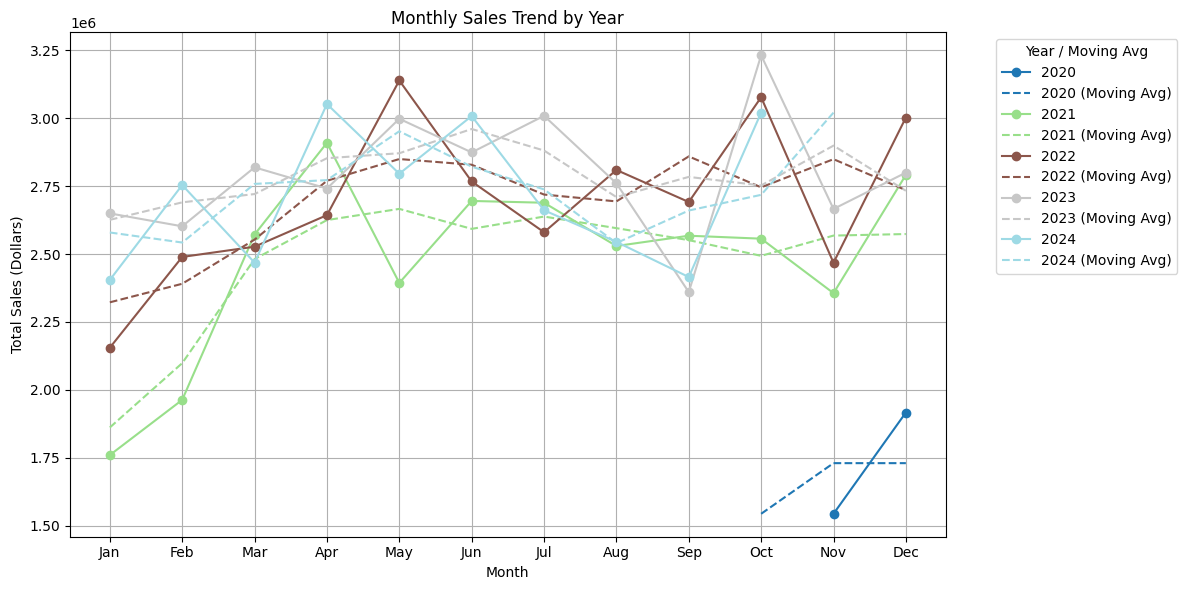


## 年毎の月次売上トレンド分析

- 年間の売上は減少傾向にあります (月次平均売上ベースの成長率: -0.6% )。
- 複数の年に渡って、11, 10月に売上の季節変動が見られる傾向があります。
- 2020年は、明確な売上の季節変動は見られません。
  - データの期間が短いか、あるいは特別な外的要因によって売上のパターンが変化した可能性があります。
- 2021年は、4, 5, 11, 12月に売上の季節変動が見られます。
  - 前年(2020年)と比較して、12, 11, 4, 5月にも変動が見られます。
    - 市場環境や消費者の行動変化などが影響している可能性があります。
- 2022年は、5, 10, 11, 12月に売上の季節変動が見られます。
  - 前年(2021年)と比較して、10月にも変動が見られます。
    - 市場環境や消費者の行動変化などが影響している可能性があります。
- 2023年は、9, 10, 11月に売上の季節変動が見られます。
  - 前年(2022年)と比較して、9月にも変動が見られます。
    - 市場環境や消費者の行動変化などが影響している可能性があります。
- 2024年は、3, 4, 9, 10月に売上の季節変動が見られます。
  - 前年(2023年)と比較して、3, 4月にも変動が見られます。
    - 市場環境や消費者の行動変化などが影響している可能性があります。

- その他の考察としては、以下のような点が挙げられます。
  - 年ごとの売上変動が大きいです (変動係数: 49.2% )。
    - 特定の年に売上が集中している可能性があります。
    - 経済状況や市場の動向、または特別なイベントの影響が考えられます。
    - 売上変動の要因を詳しく分析し、売上予測の精度向上に役立てる必要があります。
  - 経済状況や競合他社の動向なども売上トレンドに影響を与える可能性があります。
  - 今後の売上予測を行う際には、これらの要因を考慮する必要があります。


In [42]:
# 年毎月ごと

def visualize_monthly_sales_trend_by_year(sales_data: pd.DataFrame) -> None:
    """
    年毎の月次売上トレンドを可視化する関数。

    Args:
        sales_data (pd.DataFrame): 'Date' 列と 'Sale (Dollars)' 列を含む売上データ。

    Returns:
        None
    """
    # 年と月の情報を抽出
    sales_data['Year'] = sales_data['Date'].dt.year           # 年を抽出
    sales_data['Month'] = sales_data['Date'].dt.month         # 月を抽出

    # 年・月ごとの売上を集計
    monthly_sales_by_year = sales_data.groupby(['Year', 'Month'])['Sale (Dollars)'].sum().unstack(level=0)

    # 移動平均を計算 (例: 3ヶ月移動平均)
    rolling_mean = monthly_sales_by_year.rolling(window=3, center=True, min_periods=1).mean()

    # プロット
    plt.figure(figsize=(12, 6))
    ax = plt.gca()  # Axesオブジェクトを取得

    # 年ごとに異なる色を指定
    # tab20カラーマップを使用し、必要であれば個別に色を指定
    num_years = len(monthly_sales_by_year.columns)
    colors = plt.get_cmap('tab20', num_years)
    # 特定の年に色を指定したい場合、以下のように記述
    # year_colors = {2021: 'red', 2022: 'blue', 2023: 'green'}  # 例：2021年を赤、2022年を青、2023年を緑に

    # 年毎の季節性に関する考察
    seasonal_insights = []
    seasonal_months_by_year = {} # seasonal_months_by_year を初期化

    for i, year in enumerate(monthly_sales_by_year.columns):
        # color = year_colors.get(year, colors(i))  # 個別指定があればそちらを使用
        color = colors(i)  # カラーマップから色を取得

        # 実績値をプロット
        ax.plot(monthly_sales_by_year.index, monthly_sales_by_year[year], marker='o', color=colors(i), label=year)

        # 年ごとの移動平均を計算
        rolling_mean_year = monthly_sales_by_year[year].rolling(window=3, center=True, min_periods=1).mean()

        # 移動平均をプロット
        ax.plot(rolling_mean.index, rolling_mean[year], linestyle='--', color=colors(i), label=f'{year} (Moving Avg)')

        # 季節性の判定 (移動平均との差が大きい月を判定)
        sales_diff = monthly_sales_by_year[year] - rolling_mean_year
        seasonal_months = sales_diff[abs(sales_diff) > sales_diff.std()].index.tolist() #移動平均との差が標準偏差より大きい月を季節性のある月とする
        seasonal_months_by_year[year] = seasonal_months # seasonal_months_by_year に結果を格納

        if seasonal_months:
            seasonal_insights.append(f"{year}年は、{', '.join(map(str, seasonal_months))}月に売上の季節変動が見られます。")
        else:
            seasonal_insights.append(f"{year}年は、明確な売上の季節変動は見られません。")

    plt.title('Monthly Sales Trend by Year')
    plt.xlabel('Month')
    plt.ylabel('Total Sales (Dollars)')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.legend(title='Year / Moving Avg', bbox_to_anchor=(1.05, 1), loc='upper left')  # 凡例を更新

    plt.tight_layout()
    plt.show()

    # 考察文章を出力 (日本語)
    print("\n## 年毎の月次売上トレンド分析\n")

    # 年ごとの売上傾向
    yearly_sales = sales_data.groupby('Year')['Sale (Dollars)'].sum()
    monthly_sales_by_year = sales_data.groupby(['Year', 'Month'])['Sale (Dollars)'].sum().reset_index()

    # 年ごとの月次平均売上を計算
    avg_monthly_sales_by_year = monthly_sales_by_year.groupby('Year')['Sale (Dollars)'].mean()

    # 月次平均売上ベースで成長率を計算
    # 前年比で計算するように修正
    # 注意: ここで計算されるのは、データの最終年と前年の、月次平均売上の成長率です。
    #       最終年のデータが6ヶ月以上の場合は、最終年のデータのみで計算します。
    #       最終年のデータが6ヶ月未満の場合は、前年の同月のデータを用いて12ヶ月分のデータで計算します。
    #       ただし、前年のデータもない場合は、成長率をNaNに設定します。

    # データの最終年と前年を取得
    last_year = sales_data['Year'].max()
    previous_year = last_year - 1

    # 最終年と前年の月次平均売上を取得
    last_year_avg_sales = sales_data[sales_data['Year'] == last_year].groupby('Month')['Sale (Dollars)'].mean()  # 最終年の月次平均
    previous_year_avg_sales = sales_data[sales_data['Year'] == previous_year].groupby('Month')['Sale (Dollars)'].mean()  # 前年の月次平均

    # 成長率を計算 (前年比)
    # 最終年のデータが6ヶ月以上あるかどうかで処理を分岐
    if len(last_year_avg_sales) >= 6:
        # 最終年のデータのみで成長率を計算
        # 前年同月のデータと比較
        # 最終年と前年のデータに共通する月（インデックス）を抽出
        common_months = last_year_avg_sales.index.intersection(previous_year_avg_sales.index)
        # 共通する月のデータのみを抽出
        last_year_avg_sales_for_growth = last_year_avg_sales[common_months]
        previous_year_avg_sales_for_growth = previous_year_avg_sales[common_months]

        if previous_year_avg_sales_for_growth.empty:  # 前年のデータがない場合
            sales_growth_rate = float('nan')  # 成長率をNaNに設定
        else:
            # 抽出したデータを用いて、成長率を計算
            sales_growth_rate = (last_year_avg_sales_for_growth.mean() - previous_year_avg_sales_for_growth.mean()) / previous_year_avg_sales_for_growth.mean() * 100
    else:
        # 前年のデータで補完して12ヶ月分のデータで計算
        for month in range(1, 13):
            if month not in last_year_avg_sales.index and month in previous_year_avg_sales.index:
                last_year_avg_sales[month] = previous_year_avg_sales[month]

        if previous_year_avg_sales.empty:  # 前年のデータがない場合
            sales_growth_rate = float('nan')  # 成長率をNaNに設定
        else:
            # 12ヶ月分のデータで平均を計算
            # 最終年のデータに足りない月の分を1つ前の年のデータで補完
            last_year_avg = last_year_avg_sales.reindex(range(1, 13)).fillna(0).mean()  # 存在しない月は0で埋める
            previous_year_avg = previous_year_avg_sales.reindex(range(1, 13)).fillna(0).mean()  # 存在しない月は0で埋める

            if previous_year_avg != 0:
                sales_growth_rate = (last_year_avg - previous_year_avg) / previous_year_avg * 100
            else:
                sales_growth_rate = float('nan')  # 前年の売上が0の場合はNaNを設定

    # 年ごとの売上傾向の考察 (月次平均売上ベースの成長率を使用)
    if sales_growth_rate > 0:
        print(f"- 年間の売上は増加傾向にあります (月次平均売上ベースの成長率: {sales_growth_rate:.1f}% )。")
    elif sales_growth_rate < 0:
        print(f"- 年間の売上は減少傾向にあります (月次平均売上ベースの成長率: {sales_growth_rate:.1f}% )。")
    else:
        print("- 年間の売上は横ばい傾向にあります。")

    # 全体的な傾向
    seasonal_months_all_years = [month for year_data in seasonal_months_by_year.values() for month in year_data]
    common_seasonal_months = [month for month, count in pd.Series(seasonal_months_all_years).value_counts().items() if count >= 3] #3年以上で季節性があるとみなす

    if common_seasonal_months:
        print(f"- 複数の年に渡って、{', '.join(map(str, common_seasonal_months))}月に売上の季節変動が見られる傾向があります。")
        if 10 in common_seasonal_months and 11 in common_seasonal_months and 12 in common_seasonal_months:
            print("  - 年末商戦やホリデーシーズンによる需要増加などが考えられます。")

    else:
        print("- 年間を通して、共通の季節変動は見られません。")

    # 年ごとの変化
    for year, seasonal_months in seasonal_months_by_year.items():
        if seasonal_months:
            print(f"- {year}年は、{', '.join(map(str, seasonal_months))}月に売上の季節変動が見られます。")
            # 前年との比較
            if year > min(seasonal_months_by_year.keys()):
                prev_year = year - 1
                prev_year_seasonal_months = seasonal_months_by_year.get(prev_year, [])
                diff_months = set(seasonal_months) - set(prev_year_seasonal_months)
                if diff_months:
                    print(f"  - 前年({prev_year}年)と比較して、{', '.join(map(str, diff_months))}月にも変動が見られます。")
                    print("    - 市場環境や消費者の行動変化などが影響している可能性があります。")
        else:
            print(f"- {year}年は、明確な売上の季節変動は見られません。")
            print("  - データの期間が短いか、あるいは特別な外的要因によって売上のパターンが変化した可能性があります。")

    # その他の考察を動的に生成
    print("\n- その他の考察としては、以下のような点が挙げられます。")

    # 年ごとの売上変動 (数値を追加)
    yearly_sales_std = yearly_sales.std()
    yearly_sales_cv = yearly_sales_std / yearly_sales.mean() * 100  # 変動係数
    if yearly_sales_cv > 30:  # 変動係数が30%を超える場合
        print(f"  - 年ごとの売上変動が大きいです (変動係数: {yearly_sales_cv:.1f}% )。")
        print("    - 特定の年に売上が集中している可能性があります。")
        print("    - 経済状況や市場の動向、または特別なイベントの影響が考えられます。")
        print("    - 売上変動の要因を詳しく分析し、売上予測の精度向上に役立てる必要があります。")
    else:
        print(f"  - 年ごとの売上変動は比較的小さく、安定しています (変動係数: {yearly_sales_cv:.1f}% )。")

    # 特定の年の売上急増 (数値を追加)
    max_sales_year = yearly_sales.idxmax()
    max_sales = yearly_sales.max()
    avg_sales = yearly_sales.mean()
    sales_increase_rate = (max_sales - avg_sales) / avg_sales * 100  # 売上増加率
    if sales_increase_rate > 50:  # 売上増加率が50%を超える場合
        print(f"  - {max_sales_year}年の売上が特に高く、突出して増加しています (増加率: {sales_increase_rate:.1f}% )。")
        print("    - この年に特別なイベントやプロモーションが行われていた可能性があります。")
        print(f"    - {max_sales_year}年の売上増加要因を分析し、他の年にも応用できる施策を検討する必要があります。")

    # その他
    print("  - 経済状況や競合他社の動向なども売上トレンドに影響を与える可能性があります。")
    print("  - 今後の売上予測を行う際には、これらの要因を考慮する必要があります。")

visualize_monthly_sales_trend_by_year(sales_data)

※上記の補足
- 「カテゴリーデータの分析」をする目的
  - パターンの発見
    - 商品カテゴリ別、店舗別、ベンダー別に売上や販売トレンドを把握することで、売上を向上させるためのインサイトを得る。
    - 例: 売上が高いカテゴリや、パフォーマンスが優れた店舗を特定。
  - 異常値の検出
    - 極端に高いまたは低い売上を持つカテゴリや店舗を確認する。
    - 不正データや入力ミスがないかをチェック。
  - 戦略立案の材料
    - どのカテゴリや店舗にリソースを集中させるべきか、どの商品が顧客に人気があるのかを特定するため。
  - データ特性の確認
    - カテゴリごとの分布や偏りを確認し、分析の基礎情報を整理。

# クリーニングデータの出力

In [43]:
# 整形データの出力

def save_cleaned_data(
        sales_data: pd.DataFrame,
        vendor_data: pd.DataFrame,
        store_data: pd.DataFrame
    ) ->None:
    """
    整形済みデータをCSVファイルとして保存する関数。

    Args:
        sales_data (pd.DataFrame): 販売履歴データ。
        vendor_data (pd.DataFrame): ベンダーマスタデータ。
        store_data (pd.DataFrame): 店舗マスタデータ。

    Returns:
        None
    """
    sales_data.to_csv(os.path.join(OUTPUT_BASE_PATH, OUTPUT_CLEANED_SALES_FILE_NAME), index=False)
    vendor_data.to_csv(os.path.join(OUTPUT_BASE_PATH, OUTPUT_CLEANED_VENDOR_FILE_NAME), index=False)
    store_data.to_csv(os.path.join(OUTPUT_BASE_PATH, OUTPUT_CLEANED_STORE_FILE_NAME), index=False)

save_cleaned_data(sales_data, vendor_data, store_data)

# 作業内容（データサニティチェックおよびEDA）のレポート
対象: dotDataデータエンジニア課題

## 背景
本レポートは、顧客から受領したPoCデータを対象に、データの整合性確認（サニティチェック）および探索的データ分析（EDA）を実施した結果をまとめたものです。これにより、分析用データの品質向上と事前の傾向把握を目的としています。

## サニティチェック結果（仕様との不一致や修正箇所）

### 発見された問題
1. 販売履歴の`Vendor Number` カラムに1件の欠損値が存在。
2. ベンダーマスタの`Vendor Number` カラムに27件の重複行が存在。
3. 店舗マスタの`Store Number` カラムに2件の重複行が存在。

### 対応内容
1. 削除
2. 最初の1件を残して重複を削除
2. 最初の1件を残して重複を削除

#### 実施したコード例:
```python
vendor_data = vendor_data.drop_duplicates(['Vendor Number'])
```

## 探索的データ分析（EDA）の結果

### 主な知見
1. カテゴリ「AMERICAN VODKAS」が売上トップ（全体の12.6%を占める）。
2. 店舗名「HY-VEE #3 / BDI / DES MOINES」が売上トップ（全体の43.7%を占める）。また1位と2位で84%を超える。ただし店舗マスタに5店舗しかないため母数が少ないことに注意。
3. ベンダー名「DIAGEO AMERICAS」が売上トップ（全体の22.4%を占める）。
4. 店舗が所在する群「POLK」が売上トップ（全体の92.1%を占める）。ただし群の種類が3種類しかないことに注意。
5. 店舗の郵便番号「50314」が売上トップ（全体の48.4%を占める）。た1位と2位で92%を超える。だし郵便番号の種類が4種類しかないことに注意。
6. 売上を曜日ごとにみると、月曜（全体の37.8%）と木曜（同43.4%）にピークがある。
2. 売上は春頃（4月～6月）と10月にピークがあり逆に1月と11月は谷になる。夏頃（6～9月）は減少傾向。
3. `Bottles Sold` と `Sale (Dollars)` の間に強い正の相関（相関係数 = 0.92）。逆に、`Bottle Volume (ml) `と `Sale (Dollars)` の間には相関がみられない（相関係数 = 0.03）。

### 可視化
※ColabだとMarkdown内で画像表示できなかったため、画像表示のコード実行をする

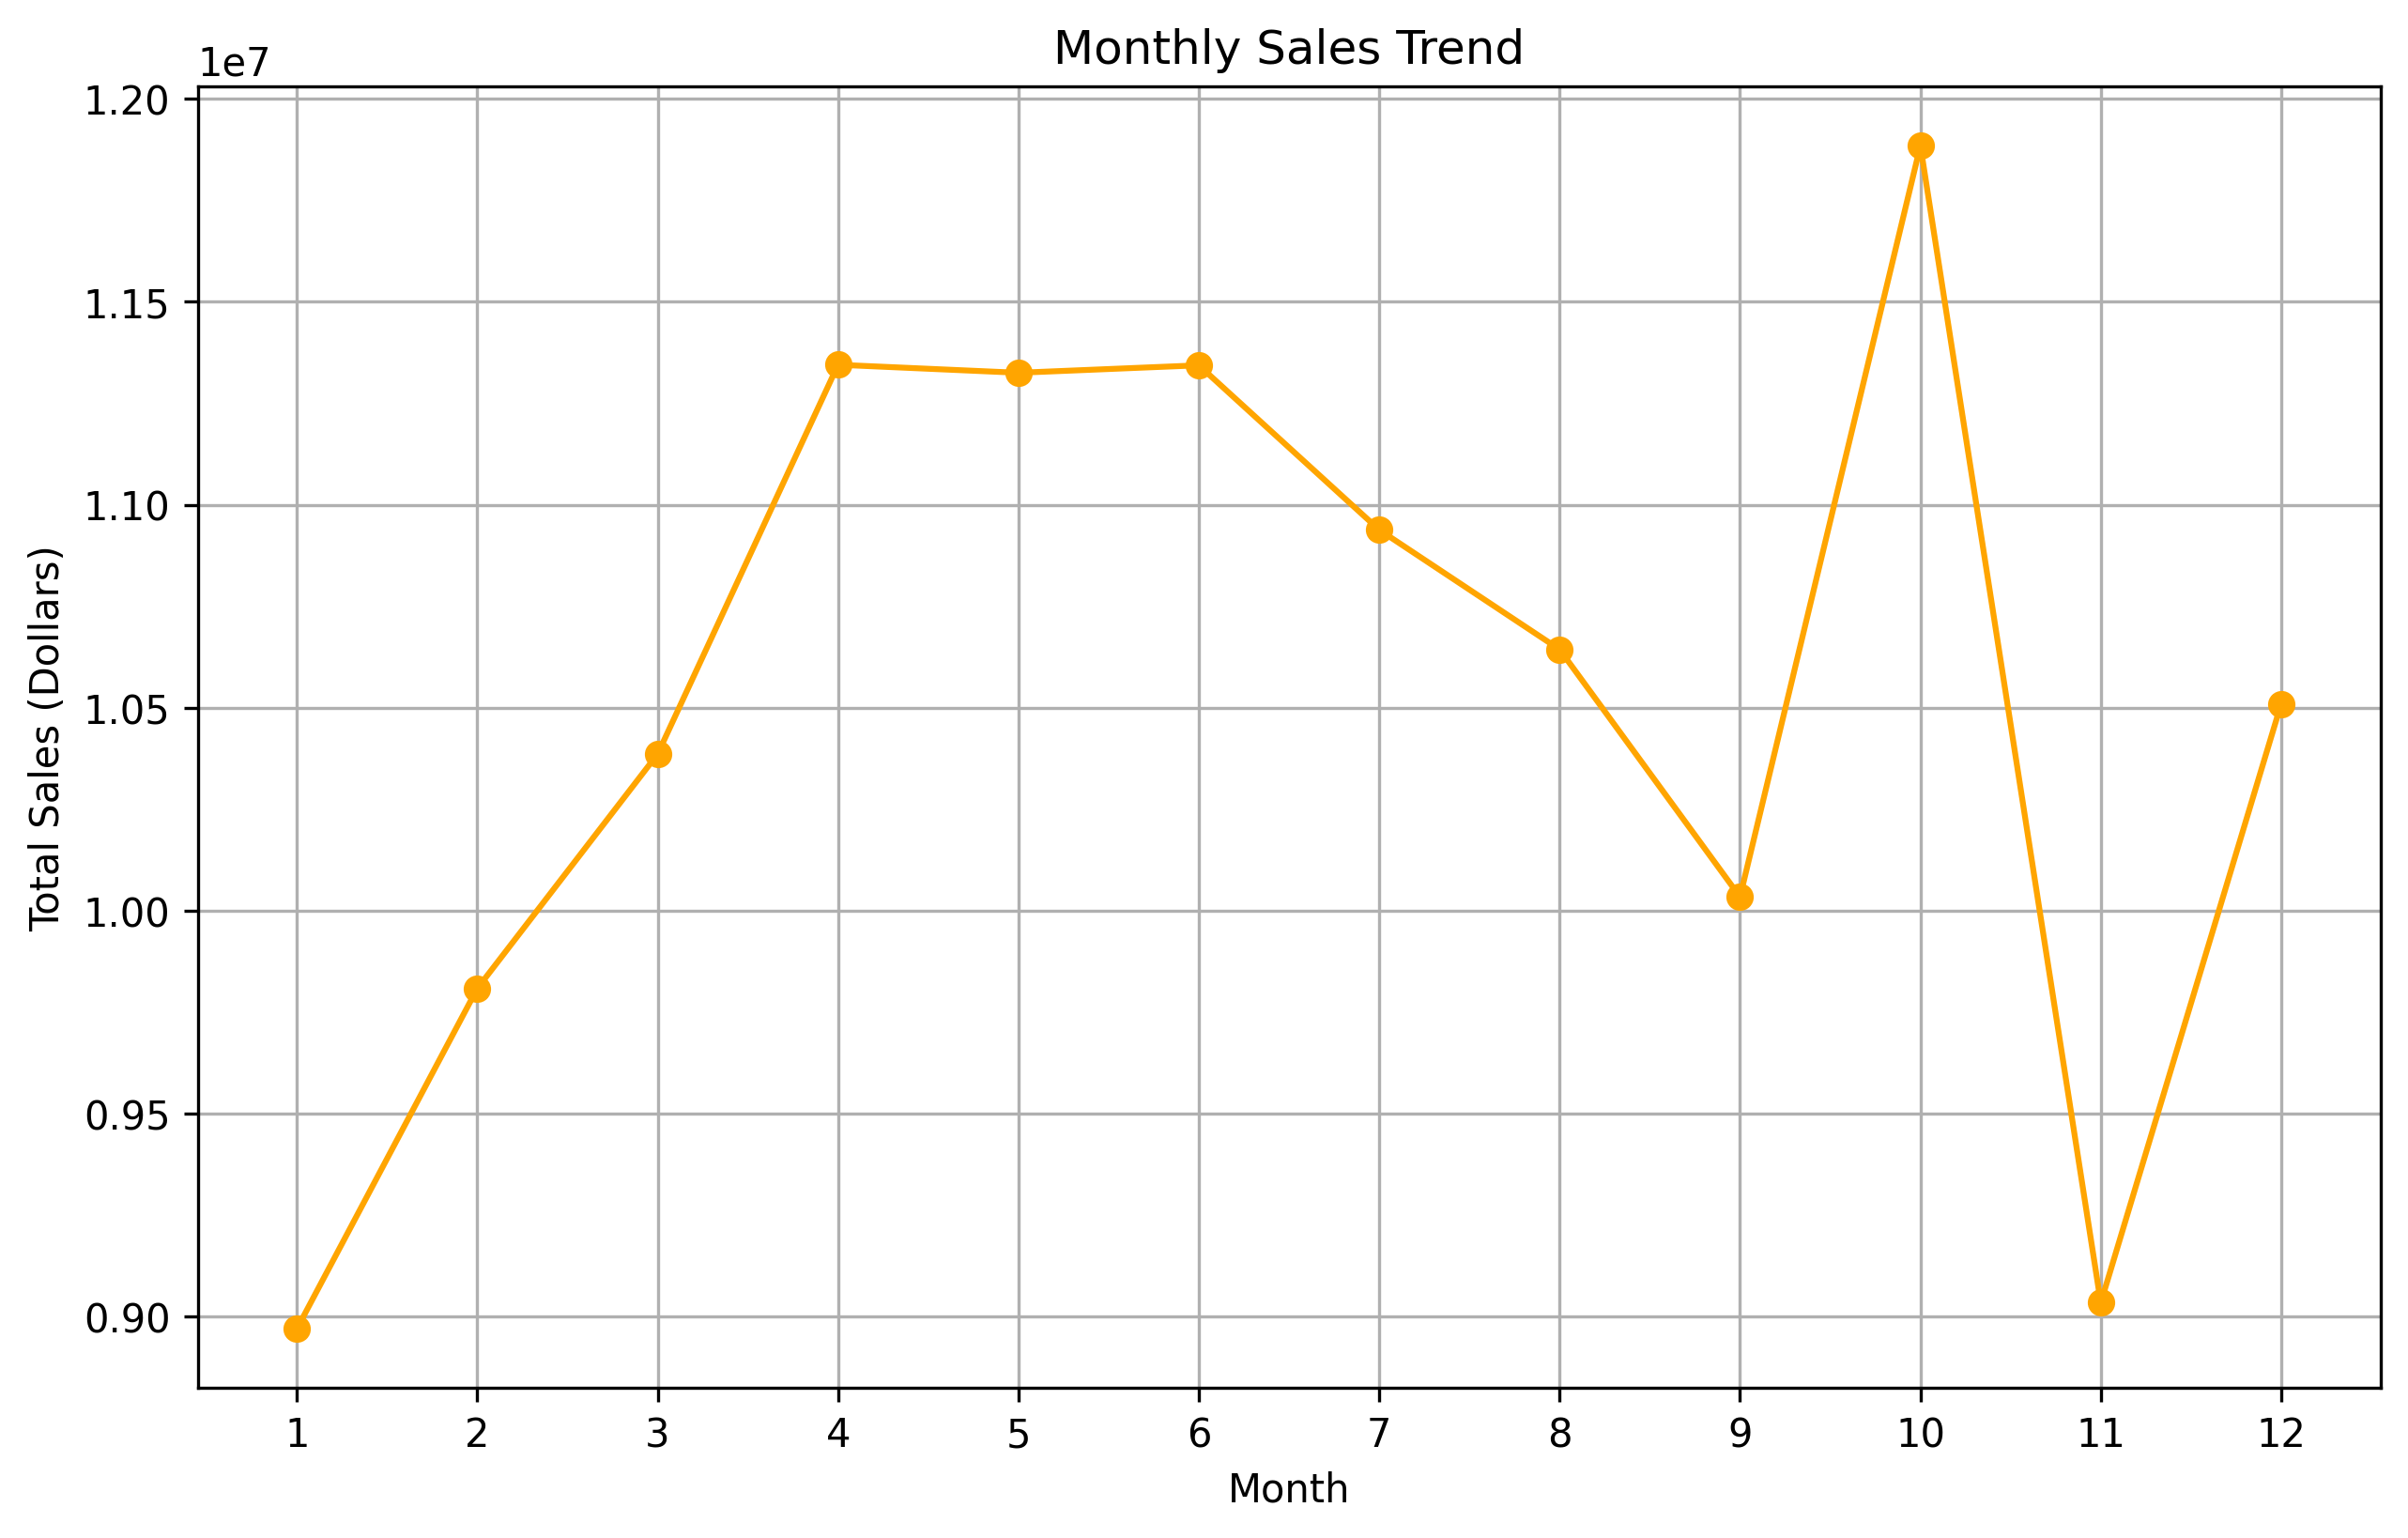

In [44]:
# 月次売上トレンド:
from IPython.display import Image
Image('/content/monthly_sales_trend.png')

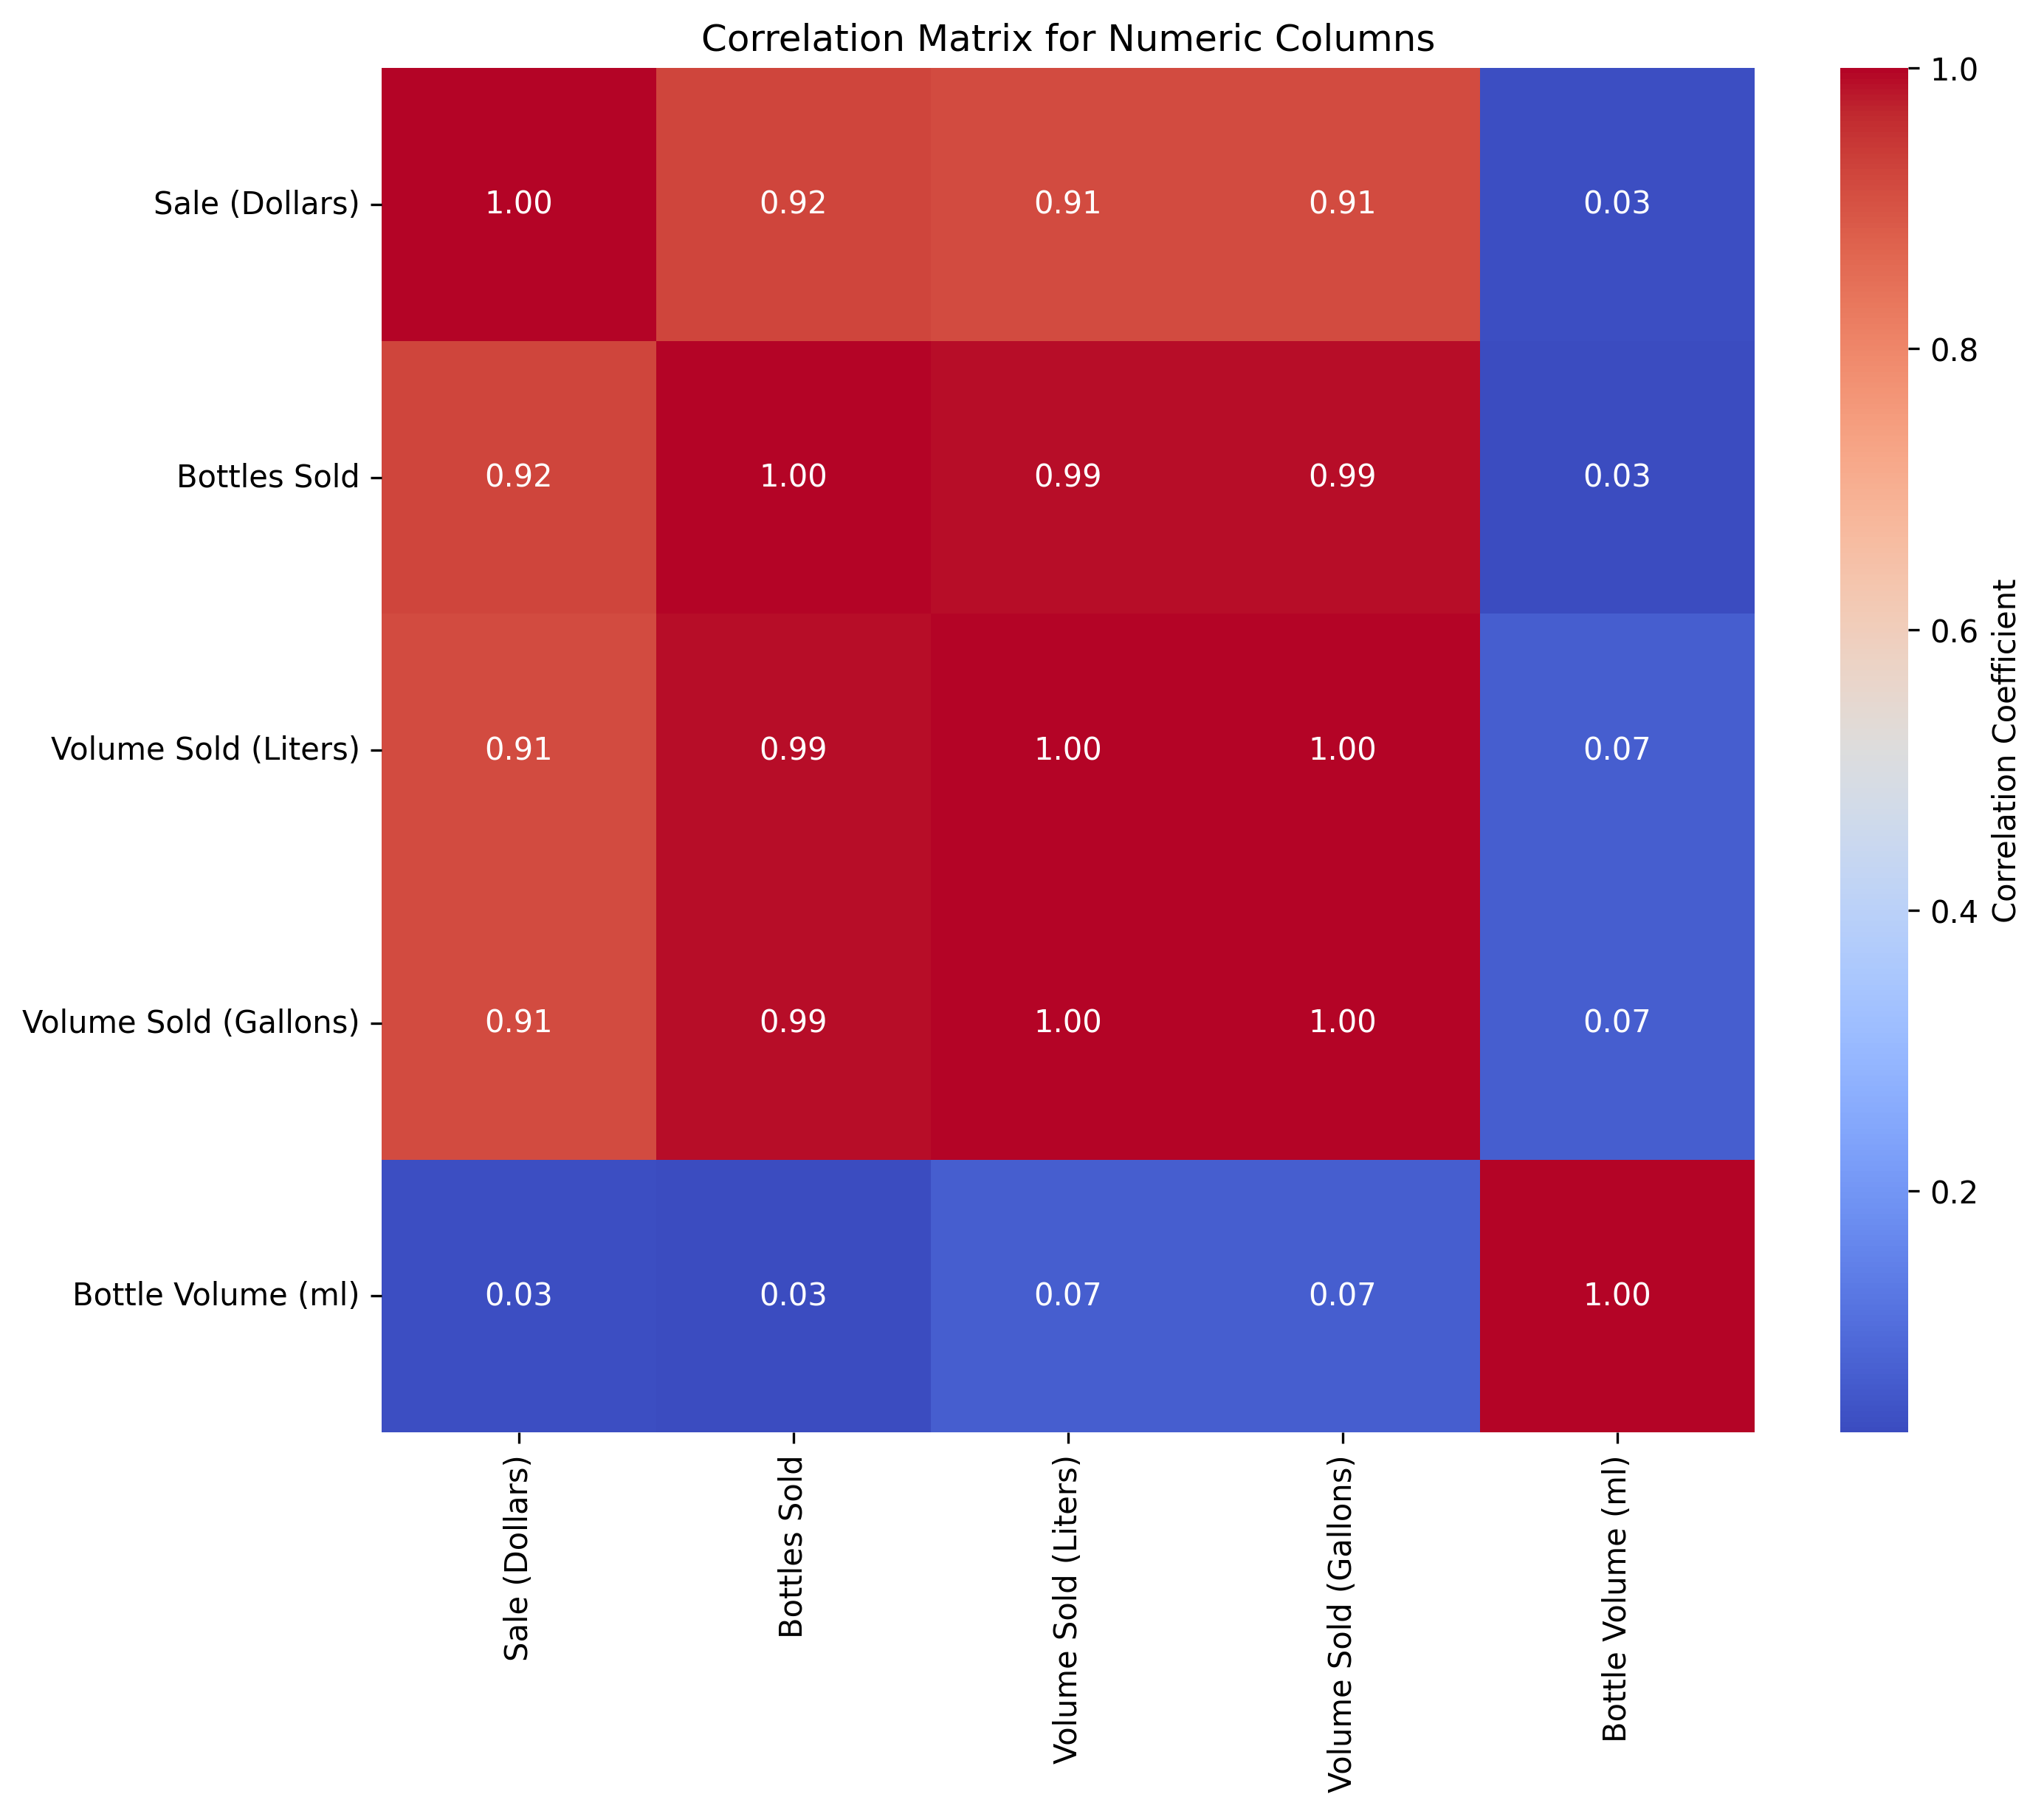

In [45]:
# 相関ヒートマップ:
from IPython.display import Image
Image('/content/correlation_matrix_heatmap.png')